# 1. Introduction

Name: Kumala Cantika Ainun Maya

Batch : SBY-004

Objective :

This project is built to help analyze and predict the feasibility of giving loans to customers based on personal information such as personal information, loan history, etc.. The prediction model is built using four models namely, KNN, SVM, Decision Tree, Random Forest, and implements one of the Ensemble Learning namely Boosting to improve prediction performance. In these models, Pipeline, Cross Validation, and Hyperparameter Tunning will also be implemented according to the existing case study. The metrics used in the model are recall metrics, because the model is expected to be able to predict all data from customers who are eligible for loans and become the top priority, with the aim of maximizing the prediction of customers who are entirely eligible for loans.

## 1.1 Dataset Column Introduction

| Column Name | Explanation
| :----:            | :---: |
| Loan_ID | Unique value of Loan ID |
| Gender | Gender (Male/Female) |
| Married | Marital status (Y/N) |
| Dependents | Number of dependents
| Education (Graduate / Not Graduate) |
| Self_Employed | Self-employed (Y/N) |
| ApplicantIncome | Income
| CoapplicantIncome | Other Income
| LoanAmount | Loan amount (in thousand) |
| Loan_Amount_Term | Loan duration (in days) |
| Credit_History | Loan history |
| Property_Area | Urban / Semi Urban / Rural |
| Loan_Status | Loan approval (Y/N) |

# 2. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder, LabelEncoder
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import pickle
import json
import warnings
warnings.filterwarnings("ignore")

# 3. Data Loading

## 3.1 Read Train Data

In [2]:
# Load data train
df_train = pd.read_csv('train.csv')

In [3]:
# Display train data
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
# Check information from data 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


The train dataset consists of 614 rows and a total of 13 columns with missing values in some columns because the number of non-null columns does not match the number of rows.

### 3.1.1 Cleaning train-set data

In [5]:
# Drop unique column
df_train.drop(columns='Loan_ID', inplace=True)

Removed the `Loan_ID` column as it is unique and not helpful to represent for future data analysis.

In [6]:
# Check duplicated data
df_train.duplicated().sum()

0

No duplicate data in the train-set

In [7]:
# Check missing value on data
df_train.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There is no missing value on data

# 4. Exploratory Data Analysis (EDA)

## 4.1 EDA Target

The target in this project is `Loan_Status`

In [8]:
# Deskripsi target
df_train['Loan_Status'].describe()

count     614
unique      2
top         Y
freq      422
Name: Loan_Status, dtype: object

The target in the train-set consists of 614 data with the highest frequency of occurrence 422 is `Y` which means eligible for a loan. 

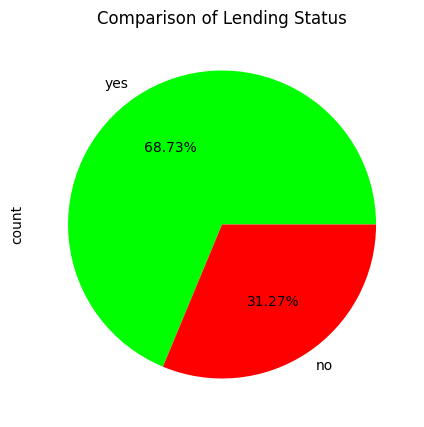

In [9]:
# Plot diagram lingkaran target Loan_Status
fig,ax1 = plt.subplots(figsize=(5,5))
df_train['Loan_Status'].value_counts().plot(kind='pie',labels=['yes', 'no'],
                                                     autopct='%.2f%%',ax=ax1, colors=['lime','red'])
plt.title('Comparison of Lending Status')
plt.show()

The pie chart is a comparison between eligible and ineligible targets, where only about **68.73%** of customers are eligible for loans.

## 4.2 EDA Fitur Numerical

In [241]:
# Description Feature Numerical
df_train[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


Based on the description of the numerical features, it can be detailed that:
- `ApplicantIncome` feature:
From the 614 train-set data, the average income of the customers is around **5403.45** with a minimum income of **150** and the maximum income is **81000**.

- Feature `CoapplicantIncome`:
From the train-set data the average side income of the customer is around **1621.24** with the lowest side income being **0 or no side income** and the highest side income being **41667**.

- `LoanAmount` feature:
From the data, the average customer borrowed **146.41** with a minimum loan of **9** and a maximum loan of **700**.

- Feature `Loan_Amount_Term`:
From the data, the average loan term is **342 days** with the minimum loan term is **12 days** and the maximum is **480 days**.

### 4.2.1 ApplicantIncome

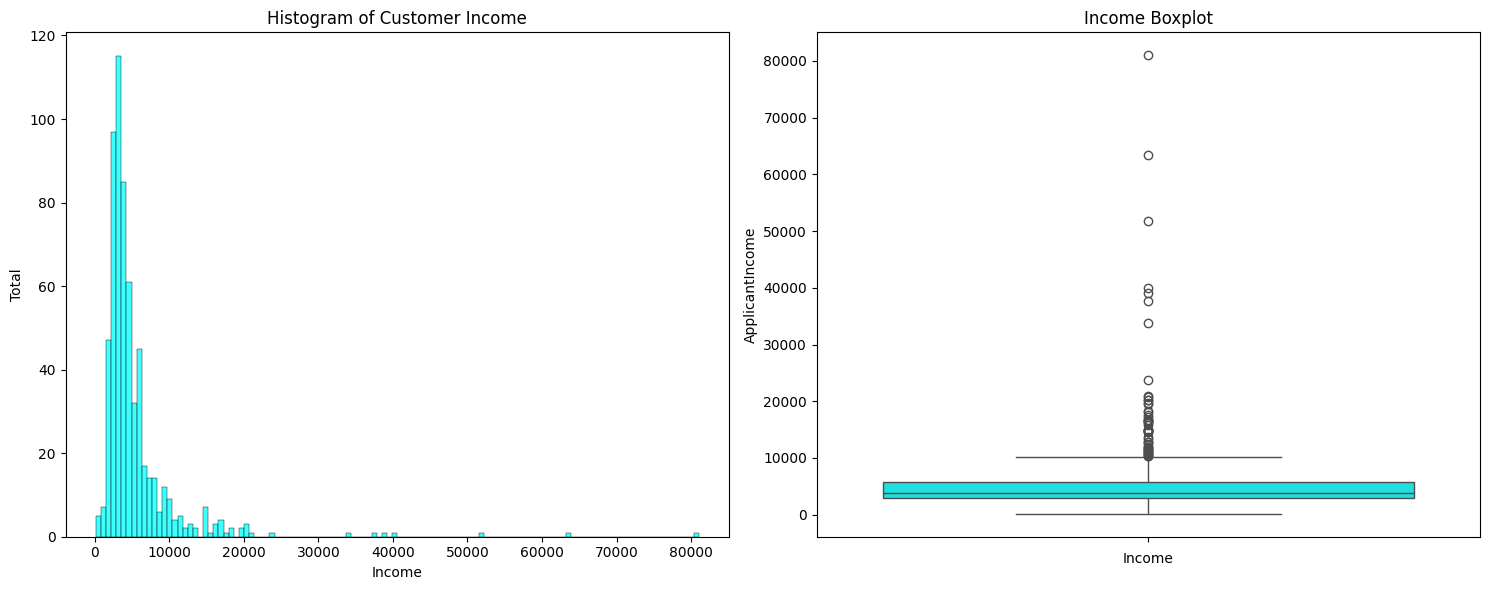

In [10]:
plt.figure(figsize=(15, 6))
# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=df_train['ApplicantIncome'], palette='Set1', color='cyan')
plt.title('Histogram of Customer Income')
plt.xlabel('Income')
plt.ylabel('Total')
# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df_train['ApplicantIncome'], color='cyan')
plt.title('Income Boxplot')
plt.xlabel('Income')

plt.tight_layout()
plt.show()

Based on histogram and boxplot visualization shows that:
- The distribution of customer income data is mostly in the range of more than 0 and less than equal to 10000.
- There are many outliers visible in the boxplot visualization.
- The distribution of data tends to be skewed, so it may be necessary to check the skewness of this feature.


### 4.2.2 CoapplicantIncome

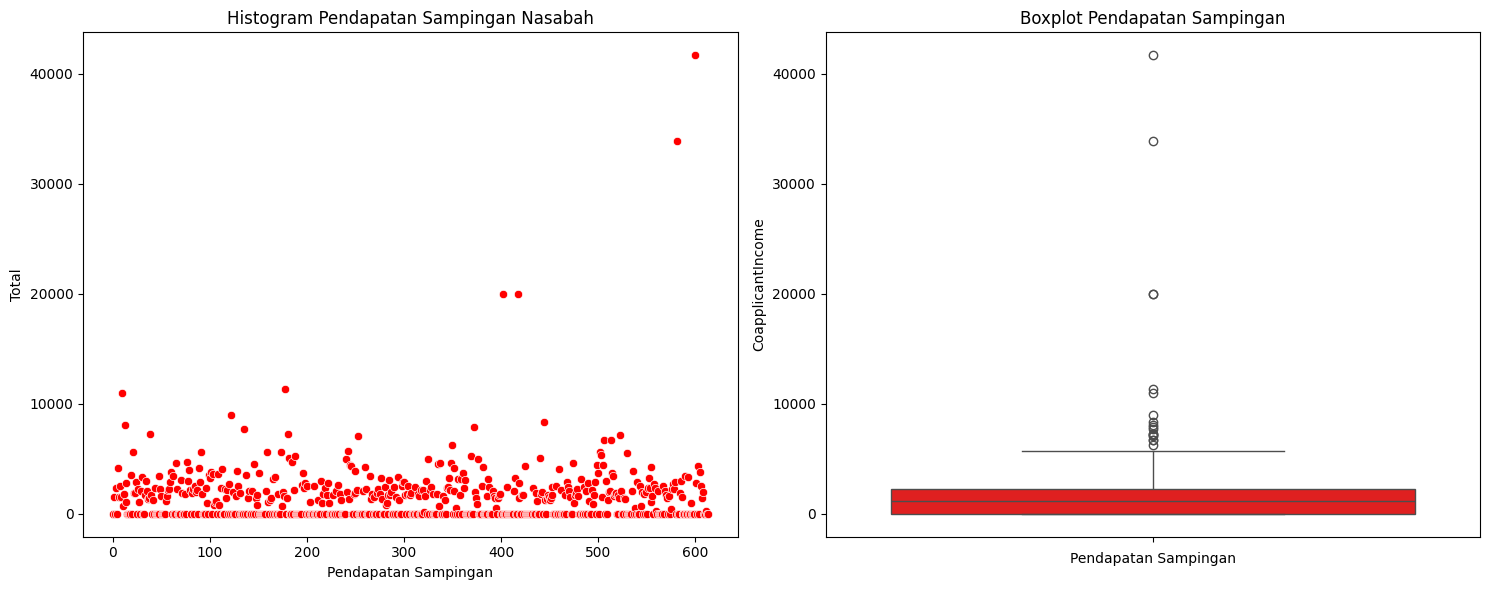

In [243]:
plt.figure(figsize=(15, 6))
# Scatterplot
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_train['CoapplicantIncome'], palette='Set1', color='red')
plt.title('Histogram Pendapatan Sampingan Nasabah')
plt.xlabel('Pendapatan Sampingan')
plt.ylabel('Total')
# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df_train['CoapplicantIncome'], color='red')
plt.title('Boxplot Pendapatan Sampingan')
plt.xlabel('Pendapatan Sampingan')

plt.tight_layout()
plt.show()

Based on histogram and boxplot visualization, it shows that:
- The distribution of customer income data is mostly in the range of 0 to less than 10000.
- There are many outliers visible in the boxplot visualization
- The distribution of data tends to be skewed, so it may be necessary to check the skewness of this feature.
- When compared to `ApplicantIncome`, the side income owned by customers is much less than the main income

### 4.2.3 LoanAmount

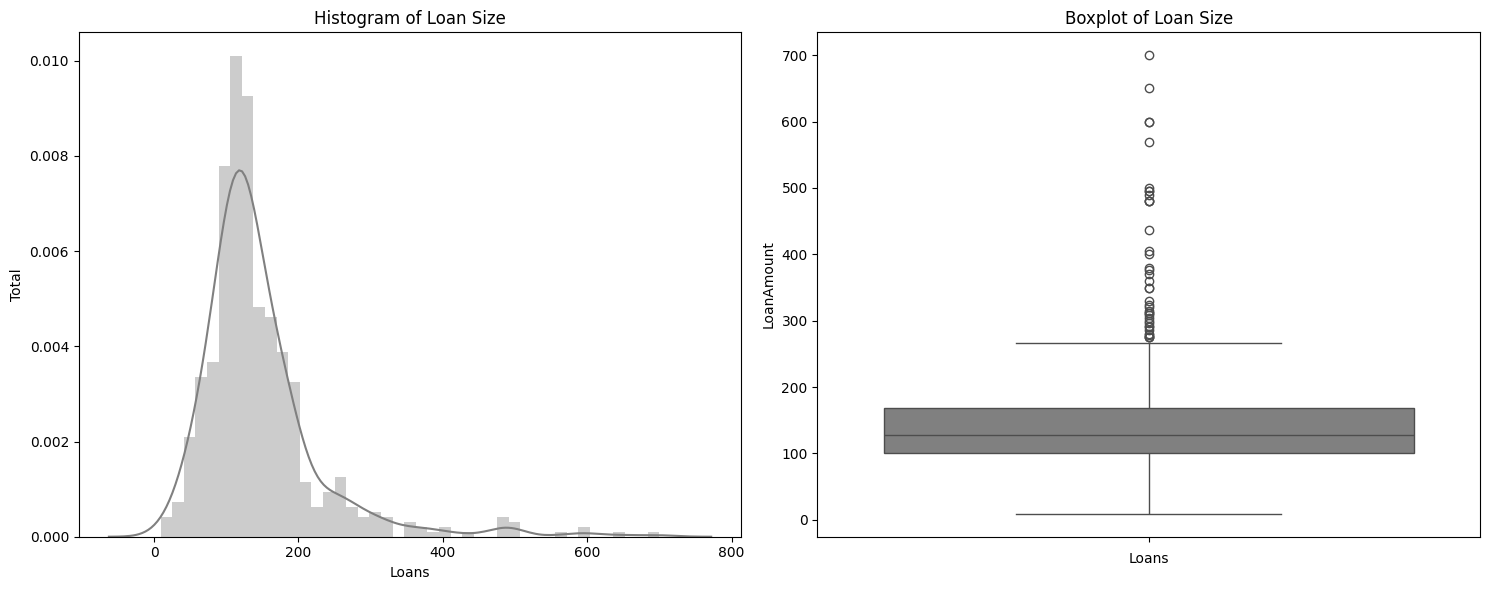

In [11]:
plt.figure(figsize=(15, 6))
# Histogram
plt.subplot(1, 2, 1)
sns.distplot(df_train['LoanAmount'], color='grey')
plt.title('Histogram of Loan Size')
plt.xlabel('Loans')
plt.ylabel('Total')
# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df_train['LoanAmount'], color='grey')
plt.title('Boxplot of Loan Size')
plt.xlabel('Loans')

plt.tight_layout()
plt.show()

Based on histogram and boxplot visualization, it shows that:
- The distribution of data for the majority of loans submitted by customers is from the range of more than equal to 100 to less than 200.
- There are many outliers visible in the boxplot visualization
- The distribution of data tends to be skewed, so it may be necessary to check skewness also on this feature

## 4.3 EDA Fitur Categorical

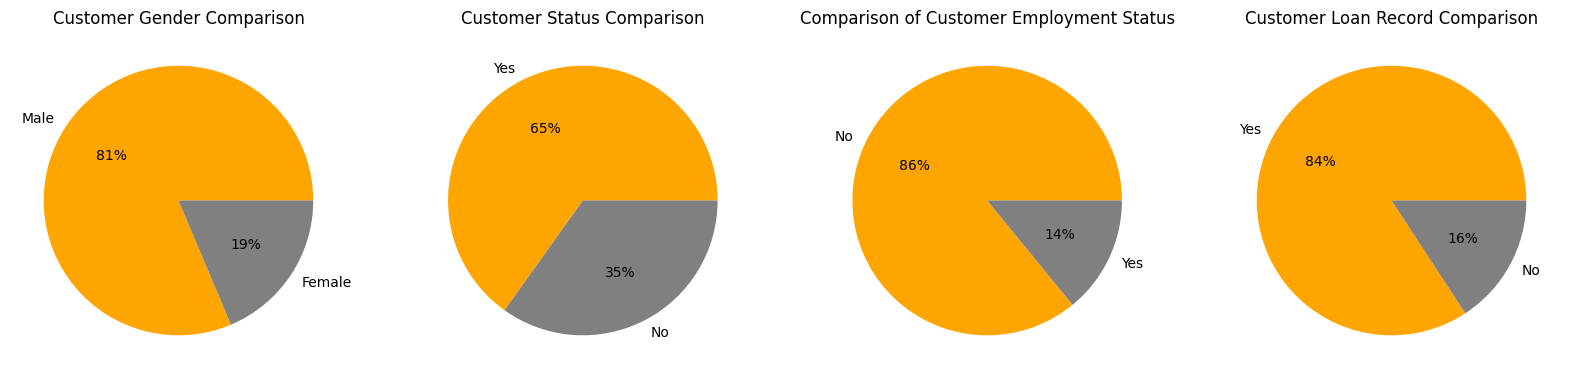

In [12]:
plt.figure(figsize = (20,10))

# Fitur Gender
plt.subplot(1,4,1) 
plt.pie(df_train['Gender'].value_counts(), labels=['Male', 'Female'], autopct='%1.0f%%',colors=['orange','grey'])
plt.title('Customer Gender Comparison')
# Fitur Married  
plt.subplot(1,4,2) 
plt.pie(df_train['Married'].value_counts(), labels=['Yes', 'No'], autopct='%1.0f%%',colors=['orange','grey'])
plt.title('Customer Status Comparison')
# Fitur Self Employed  
plt.subplot(1,4,3) 
plt.pie(df_train['Self_Employed'].value_counts(), labels=['No', 'Yes'], autopct='%1.0f%%',colors=['orange','grey'])
plt.title('Comparison of Customer Employment Status')
# Fitur Credit_History
plt.subplot(1,4,4) 
plt.pie(df_train['Credit_History'].value_counts(), labels=['Yes', 'No'], autopct='%1.0f%%',colors=['orange','grey'])
plt.title('Customer Loan Record Comparison');


The visualization results of 4 categorical features `Gender`, `Married`, `Self_Employed`, and `Credit_History` obtained the following:
- About 81% of customers are male
- About 65% of customers are married
- About 86% of customers are not self-employed (working for an agency or other person, thus likely to have a fixed income)
- About 84% of customers have had a loan before 

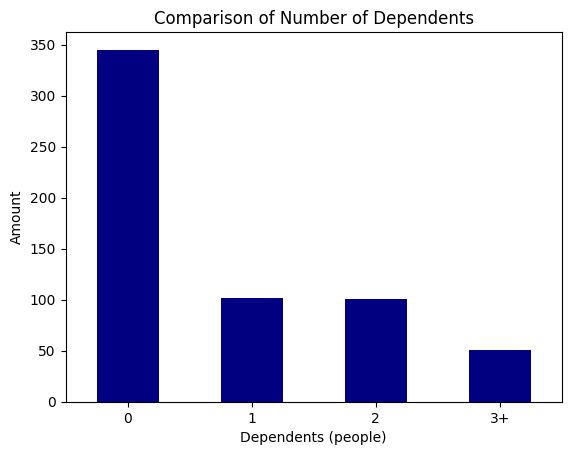

In [9]:
# Dependents status comparison bar plot
df_train['Dependents'].value_counts().sort_index().plot(kind='bar', rot=0, color='navy')
plt.title('Comparison of Number of Dependents')
plt.xlabel('Dependents (people)')
plt.ylabel('Amount')
plt.show()

Based on the visualization of the comparison bar of the number of dependents owned by customers, it is known that:
- Most customers do not have financing dependents

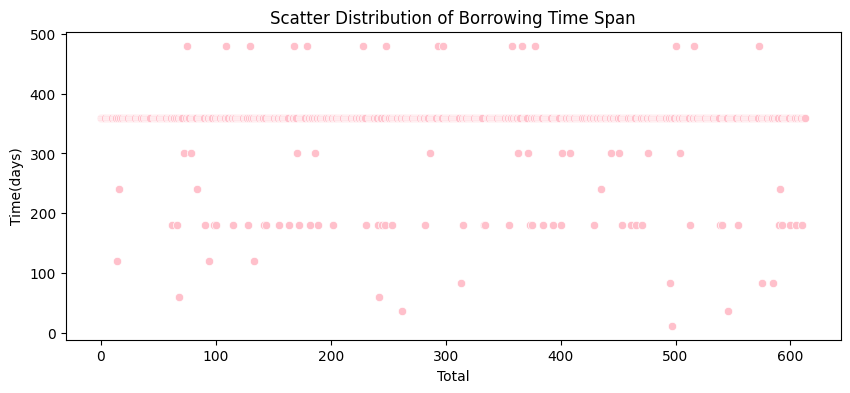

In [14]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df_train['Loan_Amount_Term'], palette='Set1', color='pink')
plt.title('Scatter Distribution of Borrowing Time Span')
plt.xlabel('Total')
plt.ylabel('Time(days)');

Based on the histagram visualization above, it shows that:
- The most frequent borrowing time span is in the range of 300 to 400 or more precisely at **360 days**. 
- In this time range, it can also mean that most customers have a loan span of 1 year.

# 5. Feature Engineering

## 5.1 Select Target and Features

### 5.1.1 Select Features

In [10]:
# Selecting features as X
X = df_train[['Gender',
                'Married',
                'Dependents',
                'Education',
                'Self_Employed',
                'ApplicantIncome',
                'CoapplicantIncome',
                'LoanAmount',
                'Loan_Amount_Term',
                'Credit_History',
                'Property_Area']]

print(X.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


Features have been successfully selected and defined as X and there are 11 features.

### 5.1.2 Select Target

In [11]:
# Selecting the default payment next month as the target in the model
y = df_train['Loan_Status']
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

The target `Loan_Status` is successfully defined as y.

## 5.2 Select train-set dan test-set

In [12]:
# Split the data into train-set and test-set using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=15)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(429, 11)
(429,)
(185, 11)
(185,)


Split data is done with a ratio of 70% train-set and 30% test-set, so that the train-set is divided into 429 rows and 11 columns, and the test-set into 185 rows and 11 columns.

## 5.3 Handling Missing Value

### 5.3.1 X_train missing value

In [13]:
# Check for missing values in X_train
X_train.isna().sum()

Gender                6
Married               2
Dependents            9
Education             0
Self_Employed        25
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           13
Loan_Amount_Term     11
Credit_History       40
Property_Area         0
dtype: int64

#### 5.3.1.1 - Gender

In [14]:
# Display missing value data on the Gender feature
display(X_train[X_train['Gender'].isnull()])

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
507,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban
576,NaN,Yes,0,Graduate,No,3087,2210.0,136.0,360.0,0.0,Semiurban
588,NaN,No,0,Graduate,No,4750,0.0,94.0,360.0,1.0,Semiurban
188,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural
171,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban
23,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural


After the checking process, it turns out that in the `Gender` feature the missing value is MAR (Missing at Random), so it can be assumed that the customer may not input data in this feature, so I decided to delete all rows of `Gender` that are missing.

In [15]:
# Delete rows with missing values
X_train.dropna(subset=['Gender'],inplace=True)

Missing value on Gender feature resolved 

#### 5.3.1.2 - Married

In [16]:
# Display missing value data on the Married feature
display(X_train[X_train['Married'].isnull()])

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
435,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban
104,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban


After the checking process it turns out that in the `Married` feature the missing value formed is MAR (Missing at Random) and there are only 2 missing values in this feature, so I decided to delete the entire missing value row in the `Married` feature.

In [17]:
# Remove missing values in `Married` feature
X_train.dropna(subset=['Married'],inplace=True)

Missing value on `Married` feature resolved successfully

#### 5.3.1.3 - Dependents

In [18]:
# Display missing values in the Dependents feature
display(X_train[X_train['Dependents'].isnull()])

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
226,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban
293,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban
346,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural
332,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban
355,Female,No,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban
102,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban
335,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban


After the checking process it turns out that in the `Dependents` feature the missing value formed is MAR (Missing at Random), so it can be assumed that the customer may not input data or does not have dependents, so I decided to change the missing value data to **0**.

In [19]:
# Fill missing data with 0
X_train['Dependents'] = X_train['Dependents'].fillna('0')

Missing value in `Dependents` feature resolved successfully

#### 5.3.1.4 - Self_Employed

In [20]:
# Displaying missing values in the Self_Employed feature
display(X_train[X_train['Self_Employed'].isnull()])

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
111,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban
380,Male,Yes,0,Graduate,NaN,3333,2500.0,128.0,360.0,1.0,Semiurban
600,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban
30,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban
24,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban
158,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural
535,Male,No,0,Not Graduate,NaN,2550,2042.0,126.0,360.0,1.0,Rural
336,Male,Yes,1,Graduate,NaN,5250,688.0,160.0,360.0,1.0,Rural
601,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural
374,Female,No,0,Graduate,NaN,2764,1459.0,110.0,360.0,1.0,Urban


After the checking process it turns out that in the `Self_Employed` feature the missing value formed is MAR (Missing at Random), so it can be assumed that the customer may not input data in this feature, so I decided to change the missing value to **Unknown**.

In [21]:
# Fill missing data with Unknown
X_train['Self_Employed'] = X_train['Self_Employed'].fillna('Unknown')

Missing value on `Self_Employed` feature resolved successfully

#### 5.3.1.5 - LoanAmount

In [22]:
# Display missing values in the LoanAmount feature
display(X_train[X_train['LoanAmount'].isnull()])

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
479,Male,Yes,2,Graduate,No,2947,1603.0,NaN,360.0,1.0,Urban
202,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban
113,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban
127,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural
605,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban
551,Male,Yes,1,Not Graduate,No,2492,2375.0,NaN,360.0,1.0,Rural
338,Female,No,3+,Not Graduate,No,1830,0.0,NaN,360.0,0.0,Urban
437,Male,Yes,0,Graduate,No,2213,1125.0,NaN,360.0,1.0,Urban
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
284,Male,Yes,0,Graduate,No,20667,0.0,NaN,360.0,1.0,Rural


After the checking process, it turns out that the `LoanAmount` feature, which is the loan proposed by the customer, is an important feature to classify whether the loan is feasible or not, so I decided to delete all rows that have missing values in this feature.

In [23]:
# Remove missing values in `LoanAmount` feature
X_train.dropna(subset=['LoanAmount'],inplace=True)

Missing value dalam fitur `LoanAmount` berhasil diatasi

#### 5.3.1.6 - Loan_Amount_Term

In [24]:
# Display missing values in Loan_Amount_Term feature
display(X_train[X_train['Loan_Amount_Term'].isnull()])

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
36,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban
197,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban
45,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban
232,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural
421,Female,No,0,Not Graduate,No,2720,0.0,80.0,NaN,0.0,Urban
165,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural
423,Male,Yes,1,Graduate,No,7250,1667.0,110.0,NaN,0.0,Urban
223,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban
112,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural
335,Male,Yes,0,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban


After the checking process, it turns out that in the `Loan_Amount_Term` feature, which is the loan period, it is assumed that the missing value occurs because no input is made because the missing value is not related to other features, so I decided to fill the missing value with the minimum loan value of **12 days**.

In [25]:
# Fill in missing data with 12
X_train['Loan_Amount_Term'] = X_train['Loan_Amount_Term'].fillna(12)

Missing value in `Loan_Amount_Term` feature resolved successfully

#### 5.3.1.7 - Credit History

In [26]:
# Display missing values in the Credit_History feature
display(X_train[X_train['Credit_History'].isnull()])

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
42,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban
348,Male,Yes,0,Graduate,No,6333,4583.0,259.0,360.0,NaN,Semiurban
16,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban
497,Male,Yes,0,Graduate,No,4625,2857.0,111.0,12.0,NaN,Urban
219,Female,Yes,2,Graduate,No,4283,2383.0,127.0,360.0,NaN,Semiurban
600,Female,No,3+,Graduate,Unknown,416,41667.0,350.0,180.0,NaN,Urban
30,Male,Yes,1,Graduate,Unknown,4166,3369.0,201.0,360.0,NaN,Urban
24,Male,Yes,1,Graduate,Unknown,3717,2925.0,151.0,360.0,NaN,Semiurban
533,Male,No,1,Graduate,No,11250,0.0,196.0,360.0,NaN,Semiurban
187,Male,Yes,0,Graduate,No,2383,2138.0,58.0,360.0,NaN,Rural


Missing values in the `Credit_History` feature, which is a track record of whether or not the customer has made a loan before, appear randomly and have no effect on other features, so I decided to fill the missing value in the feature with a value of **0** because it is assumed that the customer has never made a loan before.

In [27]:
# Fill missing data with 0
X_train['Credit_History'] = X_train['Credit_History'].fillna(0)

Missing value in `Credit_History` feature resolved successfully

### 5.3.2 y_train missing value

In [28]:
# Equalize index y_train with X_train
y_train = y_train.loc[X_train.index]

In [29]:
# Check missing values in y_train
y_train.isna().sum()

0

There are no missing values in y_train

### 5.3.3 X_test missing value

In [30]:
# Check for missing values in X_test
X_test.isna().sum()

Gender                7
Married               1
Dependents            6
Education             0
Self_Employed         7
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            9
Loan_Amount_Term      3
Credit_History       10
Property_Area         0
dtype: int64

There are many missing values in X_test, I decided to delete the rows containing missing values in X_test, because this test dataset is part of testing the prediction model.

In [31]:
# Delete rows containing missing values in X_test
X_test.dropna(inplace=True)

Missing value in X_test is resolved successfully

### 5.3.4 y_test missing value

In [32]:
# Check missing values in y_test
y_test.isna().sum()

0

In [33]:
# Equalize index y_test with X_test
y_test = y_test.loc[X_test.index]

There are no missing values in y_test

## 5.4 Handling Outlier

In [34]:
# Check skewness value for handling outliers 
X_train[['ApplicantIncome','CoapplicantIncome','LoanAmount']].skew()

ApplicantIncome      6.581839
CoapplicantIncome    7.373280
LoanAmount           2.601960
dtype: float64

The results of checking the skewness of numerical features found that all numerical features are skewed, so the next step is to check for outliers in the features using Tukey's Rule method.

In [35]:
# Data processing using Tukey's Rule on ApplicantIncome feature
q1 = df_train['ApplicantIncome'].quantile(0.25)
q3 = df_train['ApplicantIncome'].quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

# Look for outliers in the data
outlier = df_train['ApplicantIncome'][(df_train['ApplicantIncome']<low_bound) | (df_train['ApplicantIncome']>up_bound)]
print(f'Persentase outlier dalam fitur ApplicantIncome tersebut:{len(outlier)*100/len(df_train["ApplicantIncome"]):.2f}%')

Persentase outlier dalam fitur ApplicantIncome tersebut:8.14%


About 8.14% of the data in the `ApplicantIncome` feature are outliers

In [36]:
# Data processing using Tukey's Rule on the CoapplicantIncome feature
q1 = df_train['CoapplicantIncome'].quantile(0.25)
q3 = df_train['CoapplicantIncome'].quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

# Look for outliers in the data
outlier = df_train['CoapplicantIncome'][(df_train['CoapplicantIncome']<low_bound) | (df_train['CoapplicantIncome']>up_bound)]
print(f'Persentase outlier dalam fitur CoapplicantIncome tersebut:{len(outlier)*100/len(df_train["CoapplicantIncome"]):.2f}%')

Persentase outlier dalam fitur CoapplicantIncome tersebut:2.93%


About 2.93% of the data in the `CoapplicantIncome` feature are outliers

In [37]:
# Data processing using Tukey's Rule on ApplicantIncome feature
q1 = df_train['LoanAmount'].quantile(0.25)
q3 = df_train['LoanAmount'].quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

# Look for outliers in the data
outlier = df_train['LoanAmount'][(df_train['LoanAmount']<low_bound) | (df_train['LoanAmount']>up_bound)]
print(f'Persentase outlier dalam fitur LoanAmount tersebut:{len(outlier)*100/len(df_train["LoanAmount"]):.2f}%')

Persentase outlier dalam fitur LoanAmount tersebut:6.35%


About 6.35% of the data in the `LoanAmount` feature are outliers

Because the size of the outliers in the feature is relatively large, I decided to use the iqr capping method to handle the outliers.

In [38]:
# Capping the skew distribution feature using iqr
winsorizer_normal = Winsorizer(capping_method = 'iqr',
                                tail = 'both',
                                fold = 3,
                                variables = ['ApplicantIncome','CoapplicantIncome','LoanAmount'])

X_train_capped = winsorizer_normal.fit_transform(X_train)

The feature has been capped and denoted as **X_train_capped**.

In [39]:
# Check the success of ApplicantIncome feature outlier handling
print('ApplicantIncome feature')
print(f'Minimum value of X train of ApplicantIncome feature:', X_train['ApplicantIncome'].min())
print(f'Maximum value of X train of ApplicantIncome feature:', X_train['ApplicantIncome'].max())
print(f'Minimum value of X train capped feature ApplicantIncome:', X_train_capped['ApplicantIncome'].min())
print(f'Maximum value of X train capped ApplicantIncome feature:', X_train_capped['ApplicantIncome'].max())
print('')
# Check the success of outlier handling for CoapplicantIncome feature
print('CoapplicantIncome feature')
print(f'Minimum value of X train of CoapplicantIncome feature:', X_train['CoapplicantIncome'].min())
print(f'Maximum value of X train of CoapplicantIncome feature:', X_train['CoapplicantIncome'].max())
print(f'Minimum value of X train capped CoapplicantIncome feature:', X_train_capped['CoapplicantIncome'].min())
print(f'Maximum value of X train capped CoapplicantIncome feature:', X_train_capped['CoapplicantIncome'].max())
print('')
# Check the success of LoanAmount feature outlier handling
print('LoanAmount feature')
print(f'Minimum value of X train of LoanAmount feature:', X_train['LoanAmount'].min())
print(f'Maximum value of X train of LoanAmount feature:', X_train['LoanAmount'].max())
print(f'Minimum value of X train capped feature LoanAmount:', X_train_capped['LoanAmount'].min())
print(f'Maximum value of X train capped feature LoanAmount:', X_train_capped['LoanAmount'].max())

ApplicantIncome feature
Minimum value of X train of ApplicantIncome feature: 210
Maximum value of X train of ApplicantIncome feature: 81000
Minimum value of X train capped feature ApplicantIncome: 210
Maximum value of X train capped ApplicantIncome feature: 14471

CoapplicantIncome feature
Minimum value of X train of CoapplicantIncome feature: 0.0
Maximum value of X train of CoapplicantIncome feature: 41667.0
Minimum value of X train capped CoapplicantIncome feature: 0.0
Maximum value of X train capped CoapplicantIncome feature: 9620.0

LoanAmount feature
Minimum value of X train of LoanAmount feature: 9.0
Maximum value of X train of LoanAmount feature: 650.0
Minimum value of X train capped feature LoanAmount: 9.0
Maximum value of X train capped feature LoanAmount: 360.0


The capped features have successfully handled outliers as evidenced by the max value before and after changing to be smaller than before.

## 5.5 SMOTENC

Data balancing is done using SMOTENC because the data contained in the train-set are numerical and categorical types.

In [41]:
# Oversampling with SMOTENC
oversample = SMOTENC(sampling_strategy=0.5, categorical_features=[0,1,2,3,4,8,9,10], random_state=42)
X_train_balanced, y_train_balanced = oversample.fit_resample(X_train_capped, y_train)

# Check the comparison of the number of data in y_train
print(f'Before SMOTENC:', y_train.value_counts(),'\n')

# Check the comparison of the amount of data in y_train after balancing
print(f'After SMOTENC:', y_train_balanced.value_counts())

Before SMOTENC: Loan_Status
Y    291
N    118
Name: count, dtype: int64 

After SMOTENC: Loan_Status
Y    291
N    145
Name: count, dtype: int64


The train-set data was successfully balanced so that the y_train_balanced increased in the minority data N initially 118 increased to 145 data. 

## 5.6 Split Numerical and Categorical Features

In [279]:
# Separating normal and skew features
cat_col = ['Gender','Married','Education','Self_Employed','Credit_History','Property_Area','Loan_Amount_Term']
cat_col_ord = ['Dependents']
num_col = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

# Displaying results
print('Numeric columns normal: ', num_col)
print('Category columns: ', cat_col)
print('Category Ordinal columns: ', cat_col_ord)

Numeric columns normal:  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
Category columns:  ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Amount_Term']
Category Ordinal columns:  ['Dependents']


The numerical and categorical features were successfully separated.

## 5.7 Transformation of Features

### 5.7.1 Scalling Numerical Data

My feature transformation uses MinMaxScaler, because numerical features only have skewed data.

In [280]:
# Pipeline of numerical features that have been trapped
num_scaled = Pipeline([('scaler_n', MinMaxScaler())])

Feature successfully transformed

### 5.7.2 Encoding Categorical Data

Encoding is done using OneHotEncoder and OrdinalEncoder

In [281]:
# Nominal categorical feature pipeline
cat_encoding_ohe = Pipeline([('encoder_n', OneHotEncoder(handle_unknown='ignore'))])

Nominal categorical features successfully transformed with the pipeline

In [282]:
# Ordinal categorical feature pipeline
cat_encoding_ord = Pipeline([('encoder_n', OrdinalEncoder(categories=[['0','1','2','3+']]))])

Ordinal categorical features successfully transformed with the pipeline

## 5.8 Label Encoding for Targets

Label encoding is done because the target data is of object type with **Y** or **N** options, so it needs to be converted to **1** or **0**.

In [283]:
# Feature Encoding - Target
le = LabelEncoder()
le.fit(y_train_balanced)

y_train_encoded = le.transform(y_train_balanced)
y_test_encoded = le.transform(y_test)
y_train_encoded

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,

Target label successfully transformed

In [284]:
# Target label transformation result
classes = le.classes_
classes

array(['N', 'Y'], dtype=object)

Target labels have been transformed with **N** meaning **0** and **Y** meaning **1**.

## 5.9 Making/Defining Pipeline

In [285]:
# Creating a pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num_n', num_scaled, num_col),
    ('cat_n', cat_encoding_ohe, cat_col),
    ('cat_ord_n', cat_encoding_ord, cat_col_ord)
])

Pipeline of features successfully created

# 6. Model Definition

There are five models used in this project, namely:
- K-Nearest Neighbor
- Support Vector Machine
- Decision Tree 
- Random Forest
- AdaBoost Boosting Model. 

## 6.1 KNN

In [286]:
# KNN model with pipeline
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier()),  
])

## 6.2 SVM

In [287]:
# SVM model with pipeline
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC()),  
])

## 6.3 Decision Tree

In [288]:
# Decision Tree model with pipeline
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier()),  
])

## 6.4 Random Forest

In [289]:
# Random Forest model with pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier()),  
])

## 6.5 AdaBoost

In [290]:
# AdaBoost model with pipeline
boosting_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier()),  
])

The five models have been defined using the pipeline

# 7. Model Training

The **X_train_balanced** and **y_train_encoded** data train-sets were trained using the base models of the five models.

## 7.1 KNN

In [291]:
knn_pipeline.fit(X_train_balanced, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_n',
                                                  Pipeline(steps=[('scaler_n',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount']),
                                                 ('cat_n',
                                                  Pipeline(steps=[('encoder_n',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Credit_History',
                                                   'Property_Area',
                                                   'Loan_Amount_Term']),
                                                 ('cat_ord_n',
                                                  Pipeline(steps=[('encoder_n',
                                                                   OrdinalEncoder(categories=[['0',
                                                                                               '1',
                                                                                               '2',
                                                                                               '3+']]))]),
                                                  ['Dependents'])])),
                ('classifier', KNeighborsClassifier())])

## 7.2 SVM

In [292]:
svm_pipeline.fit(X_train_balanced, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_n',
                                                  Pipeline(steps=[('scaler_n',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount']),
                                                 ('cat_n',
                                                  Pipeline(steps=[('encoder_n',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Credit_History',
                                                   'Property_Area',
                                                   'Loan_Amount_Term']),
                                                 ('cat_ord_n',
                                                  Pipeline(steps=[('encoder_n',
                                                                   OrdinalEncoder(categories=[['0',
                                                                                               '1',
                                                                                               '2',
                                                                                               '3+']]))]),
                                                  ['Dependents'])])),
                ('classifier', SVC())])

## 7.3 Decision Tree

In [293]:
dt_pipeline.fit(X_train_balanced, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_n',
                                                  Pipeline(steps=[('scaler_n',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount']),
                                                 ('cat_n',
                                                  Pipeline(steps=[('encoder_n',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Credit_History',
                                                   'Property_Area',
                                                   'Loan_Amount_Term']),
                                                 ('cat_ord_n',
                                                  Pipeline(steps=[('encoder_n',
                                                                   OrdinalEncoder(categories=[['0',
                                                                                               '1',
                                                                                               '2',
                                                                                               '3+']]))]),
                                                  ['Dependents'])])),
                ('classifier', DecisionTreeClassifier())])

## 7.4 Random Forest

In [294]:
rf_pipeline.fit(X_train_balanced, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_n',
                                                  Pipeline(steps=[('scaler_n',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount']),
                                                 ('cat_n',
                                                  Pipeline(steps=[('encoder_n',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Credit_History',
                                                   'Property_Area',
                                                   'Loan_Amount_Term']),
                                                 ('cat_ord_n',
                                                  Pipeline(steps=[('encoder_n',
                                                                   OrdinalEncoder(categories=[['0',
                                                                                               '1',
                                                                                               '2',
                                                                                               '3+']]))]),
                                                  ['Dependents'])])),
                ('classifier', RandomForestClassifier())])

## 7.5 AdaBoost

In [295]:
boosting_pipeline.fit(X_train_balanced, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_n',
                                                  Pipeline(steps=[('scaler_n',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount']),
                                                 ('cat_n',
                                                  Pipeline(steps=[('encoder_n',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Credit_History',
                                                   'Property_Area',
                                                   'Loan_Amount_Term']),
                                                 ('cat_ord_n',
                                                  Pipeline(steps=[('encoder_n',
                                                                   OrdinalEncoder(categories=[['0',
                                                                                               '1',
                                                                                               '2',
                                                                                               '3+']]))]),
                                                  ['Dependents'])])),
                ('classifier', AdaBoostClassifier())])

The train-set data was successfully trained using the five models

# 8. Model Evaluation

In this evaluation model, I chose to focus on recall metrics because I want to target to maximize the detection of all customers who are eligible for loans.

## 8.1 KNN

In [296]:
# Cross validation on train-set data on KNN base model
r_train_cross_val_knn = cross_val_score(knn_pipeline,
                                     X_train_balanced,
                                     y_train_encoded,
                                     cv=3,
                                     scoring="recall")

print('Recall - All - Cross Validation  : ', r_train_cross_val_knn)
print('Recall - Mean - Cross Validation : ', r_train_cross_val_knn.mean())
print('Recall - Std - Cross Validation  : ', r_train_cross_val_knn.std())

Recall - All - Cross Validation  :  [0.8556701  0.87628866 0.88659794]
Recall - Mean - Cross Validation :  0.872852233676976
Recall - Std - Cross Validation  :  0.012857929164171623


The cross validation value is 0.872852233676976

In [297]:
# Prediction results using KNN base model
y_pred_train_knn = knn_pipeline.predict(X_train_balanced)
y_pred_test_knn = knn_pipeline.predict(X_test)

print('recall - Train Set   : ', recall_score(y_train_encoded, y_pred_train_knn))
print('recall - Test Set   : ', recall_score(y_test_encoded, y_pred_test_knn), '\n')
print('Classification Report Train : \n', classification_report(y_train_encoded, y_pred_train_knn), '\n')
print('Classification Report Test : \n', classification_report(y_test_encoded, y_pred_test_knn), '\n')

recall - Train Set   :  0.8969072164948454
recall - Test Set   :  0.9292929292929293 

Classification Report Train : 
               precision    recall  f1-score   support

           0       0.73      0.55      0.63       145
           1       0.80      0.90      0.85       291

    accuracy                           0.78       436
   macro avg       0.76      0.72      0.74       436
weighted avg       0.78      0.78      0.77       436
 

Classification Report Test : 
               precision    recall  f1-score   support

           0       0.74      0.42      0.53        48
           1       0.77      0.93      0.84        99

    accuracy                           0.76       147
   macro avg       0.75      0.67      0.69       147
weighted avg       0.76      0.76      0.74       147
 



The recall values of train and test are 0.8969072164948454 and 0.9292929292929293, respectively. 

In [298]:
base_model = {'Model': ['K-Nearest Neighbors'],
        'Recall-Training Base': [recall_score(y_train_encoded, y_pred_train_knn)],
        'Recall-Testing Base': [recall_score(y_test_encoded, y_pred_test_knn)],
        'Cross Validation Base':[r_train_cross_val_knn.mean()]}

base_model = pd.DataFrame(base_model)
base_model

,Model,Recall-Training Base,Recall-Testing Base,Cross Validation Base
0,K-Nearest Neighbors,0.896907,0.929293,0.872852


The results of cross validation and prediction using the K-Nearest Neighbors base model obtained an average cross validation train value of 87.28%. Meanwhile, the prediction of the recall value on the train-set and test-set is 89.69% and 92.92%, respectively. The results of the prediction model using the SVM base model are already in the goodfit category, so this model can be an option to become a model in maximizing loanworthy predictions, but for better prediction results, model maximization can be done by tunning.

## 8.2 SVM

In [299]:
# Cross validation on train-set data on SVM base model
r_train_cross_val_svm = cross_val_score(svm_pipeline,
                                     X_train_balanced,
                                     y_train_encoded,
                                     cv=3,
                                     scoring="recall")

print('Recall - All - Cross Validation  : ', r_train_cross_val_svm)
print('Recall - Mean - Cross Validation : ', r_train_cross_val_svm.mean())
print('Recall - Std - Cross Validation  : ', r_train_cross_val_svm.std())

Recall - All - Cross Validation  :  [0.88659794 0.86597938 0.87628866]
Recall - Mean - Cross Validation :  0.8762886597938144
Recall - Std - Cross Validation  :  0.008417490525028073


The cross validation value is 0.8762886597938144

In [300]:
# Prediction results using SVM base model
y_pred_train_svm = svm_pipeline.predict(X_train_balanced)
y_pred_test_svm = svm_pipeline.predict(X_test)

print('recall - Train Set   : ', recall_score(y_train_encoded, y_pred_train_svm))
print('recall - Test Set   : ', recall_score(y_test_encoded, y_pred_test_svm), '\n')
print('Classification Report Train : \n', classification_report(y_train_encoded, y_pred_train_svm), '\n')
print('Classification Report Test : \n', classification_report(y_test_encoded, y_pred_test_svm), '\n')

recall - Train Set   :  0.8762886597938144
recall - Test Set   :  0.98989898989899 

Classification Report Train : 
               precision    recall  f1-score   support

           0       0.66      0.48      0.56       145
           1       0.77      0.88      0.82       291

    accuracy                           0.75       436
   macro avg       0.72      0.68      0.69       436
weighted avg       0.74      0.75      0.73       436
 

Classification Report Test : 
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        48
           1       0.78      0.99      0.87        99

    accuracy                           0.80       147
   macro avg       0.87      0.70      0.73       147
weighted avg       0.83      0.80      0.78       147
 



The recall values of train and test are 0.8762886597938144 and 0.98989898989899, respectively. 

In [301]:
base_model = {'Model': ['K-Nearest Neighbors','Support Vector Machine'],
        'Recall-Training Base': [recall_score(y_train_encoded, y_pred_train_knn),recall_score(y_train_encoded, y_pred_train_svm)],
        'Recall-Testing Base': [recall_score(y_test_encoded, y_pred_test_knn),recall_score(y_test_encoded, y_pred_test_svm)],
        'Cross Validation Base':[r_train_cross_val_knn.mean(),r_train_cross_val_svm.mean()]}

base_model = pd.DataFrame(base_model)
base_model

,Model,Recall-Training Base,Recall-Testing Base,Cross Validation Base
0,K-Nearest Neighbors,0.896907,0.929293,0.872852
1,Support Vector Machine,0.876289,0.989899,0.876289


The results of cross validation and prediction using the Support Vector Machine base model obtained an average cross validation train value of 87.62%. Meanwhile, the prediction of the recall value on the train-set and test-set is 87.62% and 98.98%, respectively. The results of the prediction model using the SVM base model are included in the overfit category in the test-set, so this model for better prediction results can be maximized by tunning the model.

## 8.3 Decision Tree

In [302]:
# Cross validation on train-set data in the base model Decision Tree
r_train_cross_val_dt = cross_val_score(dt_pipeline,
                                     X_train_balanced,
                                     y_train_encoded,
                                     cv=3,
                                     scoring="recall")

print('Recall - All - Cross Validation  : ', r_train_cross_val_dt)
print('Recall - Mean - Cross Validation : ', r_train_cross_val_dt.mean())
print('Recall - Std - Cross Validation  : ', r_train_cross_val_dt.std())

Recall - All - Cross Validation  :  [0.7628866 0.7628866 0.7628866]
Recall - Mean - Cross Validation :  0.7628865979381443
Recall - Std - Cross Validation  :  0.0


The cross validation value is 0.7731958762886597

In [303]:
# Prediction results using the Decision Tre base model
y_pred_train_dt = dt_pipeline.predict(X_train_balanced)
y_pred_test_dt = dt_pipeline.predict(X_test)

print('recall - Train Set   : ', recall_score(y_train_encoded, y_pred_train_dt))
print('recall - Test Set   : ', recall_score(y_test_encoded, y_pred_test_dt), '\n')
print('Classification Report Train : \n', classification_report(y_train_encoded, y_pred_train_dt), '\n')
print('Classification Report Test : \n', classification_report(y_test_encoded, y_pred_test_dt), '\n')

recall - Train Set   :  1.0
recall - Test Set   :  0.7777777777777778 

Classification Report Train : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       291

    accuracy                           1.00       436
   macro avg       1.00      1.00      1.00       436
weighted avg       1.00      1.00      1.00       436
 

Classification Report Test : 
               precision    recall  f1-score   support

           0       0.50      0.46      0.48        48
           1       0.75      0.78      0.76        99

    accuracy                           0.67       147
   macro avg       0.62      0.62      0.62       147
weighted avg       0.67      0.67      0.67       147
 



The recall values of train and test are 1.0 and 0.7575757575757576, respectively. 

In [304]:
base_model = {'Model': ['K-Nearest Neighbors','Support Vector Machine','Decision Tree'],
        'Recall-Training Base': [recall_score(y_train_encoded, y_pred_train_knn),recall_score(y_train_encoded, y_pred_train_svm),recall_score(y_train_encoded, y_pred_train_dt)],
        'Recall-Testing Base': [recall_score(y_test_encoded, y_pred_test_knn),recall_score(y_test_encoded, y_pred_test_svm),recall_score(y_test_encoded, y_pred_test_dt)],
        'Cross Validation Base':[r_train_cross_val_knn.mean(),r_train_cross_val_svm.mean(),r_train_cross_val_dt.mean()]}

base_model = pd.DataFrame(base_model)
base_model

,Model,Recall-Training Base,Recall-Testing Base,Cross Validation Base
0,K-Nearest Neighbors,0.896907,0.929293,0.872852
1,Support Vector Machine,0.876289,0.989899,0.876289
2,Decision Tree,1.000000,0.777778,0.762887


The results of cross validation and prediction using the Decision Tree base model obtained an average cross validation train value of 77.31%. Meanwhile, the prediction of the recall value on the train-set and test-set is 100.0% and 79.79%, respectively. The results of the prediction model using the Decision Tree base model are already in the overfitting category when compared to the two previous models, so a tunning process is still needed on the model to maximize the prediction ability.

## 8.4 Random Forest

In [305]:
# Cross validation on train-set data in Random Forest base model
r_train_cross_val_rf = cross_val_score(rf_pipeline,
                                     X_train_balanced,
                                     y_train_encoded,
                                     cv=3,
                                     scoring="recall")

print('Recall - All - Cross Validation  : ', r_train_cross_val_rf)
print('Recall - Mean - Cross Validation : ', r_train_cross_val_rf.mean())
print('Recall - Std - Cross Validation  : ', r_train_cross_val_rf.std())

Recall - All - Cross Validation  :  [0.8556701  0.86597938 0.80412371]
Recall - Mean - Cross Validation :  0.8419243986254296
Recall - Std - Cross Validation  :  0.027058446302446075


The cross validation value is 0.8487972508591065

In [306]:
# Prediction results using Random Forest base model
y_pred_train_rf = rf_pipeline.predict(X_train_balanced)
y_pred_test_rf= rf_pipeline.predict(X_test)

print('recall - Train Set   : ', recall_score(y_train_encoded, y_pred_train_rf))
print('recall - Test Set   : ', recall_score(y_test_encoded, y_pred_test_rf), '\n')
print('Classification Report Train : \n', classification_report(y_train_encoded, y_pred_train_rf), '\n')
print('Classification Report Test : \n', classification_report(y_test_encoded, y_pred_test_rf), '\n')

recall - Train Set   :  1.0
recall - Test Set   :  0.9090909090909091 

Classification Report Train : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       291

    accuracy                           1.00       436
   macro avg       1.00      1.00      1.00       436
weighted avg       1.00      1.00      1.00       436
 

Classification Report Test : 
               precision    recall  f1-score   support

           0       0.70      0.44      0.54        48
           1       0.77      0.91      0.83        99

    accuracy                           0.76       147
   macro avg       0.73      0.67      0.69       147
weighted avg       0.75      0.76      0.74       147
 



The recall values of train and test are 1.0 and 0.9292929292929293, respectively.

In [307]:
base_model = {'Model': ['K-Nearest Neighbors','Support Vector Machine','Decision Tree','Random Forest'],
        'Recall-Training Base': [recall_score(y_train_encoded, y_pred_train_knn),recall_score(y_train_encoded, y_pred_train_svm),recall_score(y_train_encoded, y_pred_train_dt),recall_score(y_train_encoded, y_pred_train_rf)],
        'Recall-Testing Base': [recall_score(y_test_encoded, y_pred_test_knn),recall_score(y_test_encoded, y_pred_test_svm),recall_score(y_test_encoded, y_pred_test_dt),recall_score(y_test_encoded, y_pred_test_rf)],
        'Cross Validation Base':[r_train_cross_val_knn.mean(),r_train_cross_val_svm.mean(),r_train_cross_val_dt.mean(),r_train_cross_val_rf.mean()]}

base_model = pd.DataFrame(base_model)
base_model

,Model,Recall-Training Base,Recall-Testing Base,Cross Validation Base
0,K-Nearest Neighbors,0.896907,0.929293,0.872852
1,Support Vector Machine,0.876289,0.989899,0.876289
2,Decision Tree,1.000000,0.777778,0.762887
3,Random Forest,1.000000,0.909091,0.841924


The results of cross validation and prediction using the Random Forest base model obtained an average cross validation train value of 78.38%. Meanwhile, in prediction, the recall value in the train-set and test-set is 100.0% and 92.92%, respectively. The results of the prediction model using the Random Forest base model are already in the overfitting category when compared to the two previous models KNN and SVM, so it is also still necessary to tune the model to maximize the prediction ability.

## 8.5 Boosting

In [308]:
# Cross validation on train-set data on AdaBoost base model
r_train_cross_val_boosting = cross_val_score(boosting_pipeline,
                                     X_train_balanced,
                                     y_train_encoded,
                                     cv=3,
                                     scoring="recall")

print('Recall - All - Cross Validation  : ', r_train_cross_val_boosting)
print('Recall - Mean - Cross Validation : ', r_train_cross_val_boosting.mean())
print('Recall - Std - Cross Validation  : ', r_train_cross_val_boosting.std())

Recall - All - Cross Validation  :  [0.78350515 0.83505155 0.83505155]
Recall - Mean - Cross Validation :  0.8178694158075602
Recall - Std - Cross Validation  :  0.024299202102630518


The cross validation value is 0.8178694158075602

In [309]:
# Prediction results using the AdaBoost base model
y_pred_train_boosting = boosting_pipeline.predict(X_train_balanced)
y_pred_test_boosting = boosting_pipeline.predict(X_test)

print('recall - Train Set   : ', recall_score(y_train_encoded, y_pred_train_boosting))
print('recall - Test Set   : ', recall_score(y_test_encoded, y_pred_test_boosting ), '\n')
print('Classification Report Train : \n', classification_report(y_train_encoded, y_pred_train_boosting), '\n')
print('Classification Report Test : \n', classification_report(y_test_encoded, y_pred_test_boosting ), '\n')

recall - Train Set   :  0.9003436426116839
recall - Test Set   :  0.898989898989899 

Classification Report Train : 
               precision    recall  f1-score   support

           0       0.74      0.56      0.64       145
           1       0.80      0.90      0.85       291

    accuracy                           0.79       436
   macro avg       0.77      0.73      0.74       436
weighted avg       0.78      0.79      0.78       436
 

Classification Report Test : 
               precision    recall  f1-score   support

           0       0.63      0.35      0.45        48
           1       0.74      0.90      0.81        99

    accuracy                           0.72       147
   macro avg       0.69      0.63      0.63       147
weighted avg       0.71      0.72      0.70       147
 



The recall values of train and test are 0.9003436426116839 and 0.898989898989899, respectively.

In [310]:
base_model = {'Model': ['K-Nearest Neighbors','Support Vector Machine','Decision Tree','Random Forest','Ada Boost'],
        'Recall-Training Base': [recall_score(y_train_encoded, y_pred_train_knn),recall_score(y_train_encoded, y_pred_train_svm),recall_score(y_train_encoded, y_pred_train_dt),recall_score(y_train_encoded, y_pred_train_rf),recall_score(y_train_encoded, y_pred_train_boosting)],
        'Recall-Testing Base': [recall_score(y_test_encoded, y_pred_test_knn),recall_score(y_test_encoded, y_pred_test_svm),recall_score(y_test_encoded, y_pred_test_dt),recall_score(y_test_encoded, y_pred_test_rf),recall_score(y_test_encoded, y_pred_test_boosting)],
        'Cross Validation Base':[r_train_cross_val_knn.mean(),r_train_cross_val_svm.mean(),r_train_cross_val_dt.mean(),r_train_cross_val_rf.mean(),r_train_cross_val_boosting.mean()]}

base_model = pd.DataFrame(base_model)
base_model

,Model,Recall-Training Base,Recall-Testing Base,Cross Validation Base
0,K-Nearest Neighbors,0.896907,0.929293,0.872852
1,Support Vector Machine,0.876289,0.989899,0.876289
2,Decision Tree,1.000000,0.777778,0.762887
3,Random Forest,1.000000,0.909091,0.841924
4,Ada Boost,0.900344,0.898990,0.817869


The results of cross validation and prediction using the AdaBoost base model obtained an average cross validation train value of 81.78%. Meanwhile, in prediction, the recall value on the train-set and test-set is 90.03% and 89.89%, respectively. The results of the prediction model using the AdaBoost base model fall into the goodfit category just like the KNN and SVM models, because the cross validation, recall train and test values are quite good. However, the AdaBoost model is still inferior to the KNN and SVM models, so that to obtain better prediction results, a tunning process will be carried out.

# 9. Model Analysis 1

The following are the cross validation and prediction results of the five base models:

In [311]:
base_model

,Model,Recall-Training Base,Recall-Testing Base,Cross Validation Base
0,K-Nearest Neighbors,0.896907,0.929293,0.872852
1,Support Vector Machine,0.876289,0.989899,0.876289
2,Decision Tree,1.000000,0.777778,0.762887
3,Random Forest,1.000000,0.909091,0.841924
4,Ada Boost,0.900344,0.898990,0.817869


- The KNN base model has a relatively good cross validation value when compared to the Decision Tree, Random Forest, and AdaBoost models, this model is also included in the godfit category because the train and test recall values are small and more than 85%. This KNN base model is good enough if applied in predicting the classification of customer loan status.

- The SVM base model has the largest cross validation but based on the train and test recall it is included in the overfit category in the test data, so it is less suitable to be applied in the customer loan status dataset, because it will maximize the prediction that the customer will be eligible for a loan and this will result in the model detecting that the entire testing data is eligible for a loan.

- The Decision Tree base model has the smallest cross validation compared to the other 4 models, with the shortcomings of the decision tree model which is easier to overfiting also causes overfit in predictions using this dataset. The tunning process is needed in this model to get maximum results. 

- The Random Forest base model has a fairly good cross validation, but with a concept that resembles a decision tree model where this model is very easy to overfiting, the random forest base model is still classified as unsuitable if applied in this model, because with the aim of maximizing the detection of all data that is eligible for loans with this model, the data will be less strict to predict between yes and no so it still needs to be tuned to find out a better model.

- The AdaBoost base model has a fairly good cross validation and is included in the goodfit category with a small bias value or difference between train and test. This base model can be applied in predicting loan status classification, but when compared to the KNN base model this model is still below it.

- Of the five models, the tunning process still needs to be done to improve and see the best ability of the five models to predict this loan status dataset, the models that really need to be tuned are the Decision Tree, Random Forest, and SVM models, because the three base models show the overfit category. 



# 10. Hyperparameter Tunning

The tunning process on the five models is carried out by adding several default and non-default parameters, in order to obtain the right parameters so that the prediction model can be maximized in classifying data.

## 10.1 KNN

In [312]:
# Parameter search 
grid_params = {'classifier__n_neighbors' : [1,3,5,7,8,9,10,20,30,40,50],
                'classifier__weights' : ['uniform','distance'],
                'classifier__leaf_size' : [10,20,30,40,50,60,70,80,90,100],
                'classifier__metric' : ['minkowski','euclidean','manhattan']}        
grid_params

{'classifier__n_neighbors': [1, 3, 5, 7, 8, 9, 10, 20, 30, 40, 50],
 'classifier__weights': ['uniform', 'distance'],
 'classifier__leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'classifier__metric': ['minkowski', 'euclidean', 'manhattan']}

The parameters selected for the tunning process are n_neighbors, weights, leaf_size, and metric.

In [313]:
# Training model with tunning
knn_gridcv = GridSearchCV(knn_pipeline,
                         param_grid=grid_params,
                         cv=3,
                         n_jobs=-1,
                         refit=True,
                         verbose=5,
                         return_train_score=True,
                         scoring='recall')

knn_gridcv.fit(X_train_balanced, y_train_encoded)

Fitting 3 folds for each of 660 candidates, totalling 1980 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_n',
                                                                         Pipeline(steps=[('scaler_n',
                                                                                          MinMaxScaler())]),
                                                                         ['ApplicantIncome',
                                                                          'CoapplicantIncome',
                                                                          'LoanAmount']),
                                                                        ('cat_n',
                                                                         Pipeline(steps=[('encoder_n',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'Married',
                                                                          'Education',
                                                                          'Self_Employed',
                                                                          'Credit_History',
                                                                          'Pro...
                                                                                                                      '3+']]))]),
                                                                         ['Dependents'])])),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__leaf_size': [10, 20, 30, 40, 50, 60, 70,
                                                   80, 90, 100],
                         'classifier__metric': ['minkowski', 'euclidean',
                                                'manhattan'],
                         'classifier__n_neighbors': [1, 3, 5, 7, 8, 9, 10, 20,
                                                     30, 40, 50],
                         'classifier__weights': ['uniform', 'distance']},
             return_train_score=True, scoring='recall', verbose=5)

Training with cross validation is done

In [314]:
# Best parameters found
knn_gridcv.best_params_

{'classifier__leaf_size': 10,
 'classifier__metric': 'minkowski',
 'classifier__n_neighbors': 50,
 'classifier__weights': 'uniform'}

The best parameters obtained in this Grid Search process are as shown above

In [315]:
# Defining the best model
knn_gridcv_best = knn_gridcv.best_estimator_

Define a model with best parameters

In [316]:
# KNN tunning cross validation model
r_train_cross_val_knn_tunning = cross_val_score(knn_pipeline,
                                     X_train_balanced,
                                     y_train_encoded,
                                     cv=3,
                                     scoring="recall")

print('Recall - All - Cross Validation  : ', r_train_cross_val_knn_tunning)
print('Recall - Mean - Cross Validation : ', r_train_cross_val_knn_tunning.mean())
print('Recall - Std - Cross Validation  : ', r_train_cross_val_knn_tunning.std())

Recall - All - Cross Validation  :  [0.8556701  0.87628866 0.88659794]
Recall - Mean - Cross Validation :  0.872852233676976
Recall - Std - Cross Validation  :  0.012857929164171623


Cross validation results obtained 0.872852233676976

In [317]:
# Predicted recall parameter of KNN tunning model
y_pred_train_knn_tunning = knn_pipeline.predict(X_train_balanced)
y_pred_test_knn_tunning= knn_pipeline.predict(X_test)

print('recall - Train Set   : ', recall_score(y_train_encoded, y_pred_train_knn_tunning))
print('recall - Test Set   : ', recall_score(y_test_encoded, y_pred_test_knn_tunning), '\n')
print('Classification Report Train: \n', classification_report(y_train_encoded, y_pred_train_knn_tunning), '\n')
print('Classification Report Test: \n', classification_report(y_test_encoded, y_pred_test_knn_tunning), '\n')

recall - Train Set   :  0.8969072164948454
recall - Test Set   :  0.9292929292929293 

Classification Report Train: 
               precision    recall  f1-score   support

           0       0.73      0.55      0.63       145
           1       0.80      0.90      0.85       291

    accuracy                           0.78       436
   macro avg       0.76      0.72      0.74       436
weighted avg       0.78      0.78      0.77       436
 

Classification Report Test: 
               precision    recall  f1-score   support

           0       0.74      0.42      0.53        48
           1       0.77      0.93      0.84        99

    accuracy                           0.76       147
   macro avg       0.75      0.67      0.69       147
weighted avg       0.76      0.76      0.74       147
 



The training and test results on recall are 0.8969072164948454 and 0.929292929292929, respectively.

In [318]:
tunning_model = {'Model': ['K-Nearest Neighbors'],
        'Recall-Training Base': [recall_score(y_train_encoded, y_pred_train_knn)],
        'Recall-Testing Base': [recall_score(y_test_encoded, y_pred_test_knn)],
        'Cross Validation Base':[r_train_cross_val_knn.mean()],
        'Recall-Training Tunning': [recall_score(y_train_encoded, y_pred_train_knn_tunning)],
        'Recall-Testing Tunning': [recall_score(y_test_encoded, y_pred_test_knn_tunning)],
        'Cross Validation Tunning':[r_train_cross_val_knn_tunning.mean()]}

tunning_model = pd.DataFrame(tunning_model)
tunning_model

,Model,Recall-Training Base,Recall-Testing Base,Cross Validation Base,Recall-Training Tunning,Recall-Testing Tunning,Cross Validation Tunning
0,K-Nearest Neighbors,0.896907,0.929293,0.872852,0.896907,0.929293,0.872852


After passing the tunning process on the KNN model, the cross validation is 87.28%, the train and test values are 89.69% and 92.92% respectively. The results are the same as the KNN base model, there is no change at all after the tunning process. This shows that the KNN model can predict very well using the base model. It is also known that with the cross validation, train, and test values, the KNN model is already classified in the goodfit category, which means that the model has a slight bias known from the difference in training and test values.

## 10.2 SVM

In [319]:
# Parameter search 
grid_params = {'classifier__C' : [0.1,1,5,10,50,100],
                'classifier__kernel' : ['rbf','linear'],
                'classifier__gamma' : ['scale',1, 5 ,10,50]}        
grid_params

{'classifier__C': [0.1, 1, 5, 10, 50, 100],
 'classifier__kernel': ['rbf', 'linear'],
 'classifier__gamma': ['scale', 1, 5, 10, 50]}

The parameters selected in tunning this model are C, kernel, and gamma.

In [320]:
# Training model with tunning
svm_gridcv = GridSearchCV(svm_pipeline,
                         param_grid=grid_params,
                         cv=3,
                         n_jobs=-1,
                         refit=True,
                         verbose=5,
                         return_train_score=True,
                         scoring='recall')

svm_gridcv.fit(X_train_balanced, y_train_encoded)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_n',
                                                                         Pipeline(steps=[('scaler_n',
                                                                                          MinMaxScaler())]),
                                                                         ['ApplicantIncome',
                                                                          'CoapplicantIncome',
                                                                          'LoanAmount']),
                                                                        ('cat_n',
                                                                         Pipeline(steps=[('encoder_n',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'Married',
                                                                          'Education',
                                                                          'Self_Employed',
                                                                          'Credit_History',
                                                                          'Pro...Area',
                                                                          'Loan_Amount_Term']),
                                                                        ('cat_ord_n',
                                                                         Pipeline(steps=[('encoder_n',
                                                                                          OrdinalEncoder(categories=[['0',
                                                                                                                      '1',
                                                                                                                      '2',
                                                                                                                      '3+']]))]),
                                                                         ['Dependents'])])),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 5, 10, 50, 100],
                         'classifier__gamma': ['scale', 1, 5, 10, 50],
                         'classifier__kernel': ['rbf', 'linear']},
             return_train_score=True, scoring='recall', verbose=5)

Training with cross validation is done

In [321]:
# Best parameters found
svm_gridcv.best_params_

{'classifier__C': 0.1,
 'classifier__gamma': 'scale',
 'classifier__kernel': 'rbf'}

The best parameters obtained in this Grid Search process are as shown above

In [322]:
# Defining the best model
svm_gridcv_best = svm_gridcv.best_estimator_

Define a model with best parameters

In [323]:
# Validasi silang penyetelan model SVM
r_train_cross_val_svm_tunning = cross_val_score(svm_pipeline,
                                     X_train_balanced,
                                     y_train_encoded,
                                     cv=3,
                                     scoring="recall")

print('Recall - All - Cross Validation  : ', r_train_cross_val_svm_tunning)
print('Recall - Mean - Cross Validation : ', r_train_cross_val_svm_tunning.mean())
print('Recall - Std - Cross Validation  : ', r_train_cross_val_svm_tunning.std())

Recall - All - Cross Validation  :  [0.88659794 0.86597938 0.87628866]
Recall - Mean - Cross Validation :  0.8762886597938144
Recall - Std - Cross Validation  :  0.008417490525028073


The cross validation value after tunning is 0.8762886597938144

In [324]:
# SVM parameter tuning model prediction
y_pred_train_svm_tunning = svm_pipeline.predict(X_train_balanced)
y_pred_test_svm_tunning= svm_pipeline.predict(X_test)

print('recall - Train Set   : ', recall_score(y_train_encoded, y_pred_train_svm_tunning))
print('recall - Test Set   : ', recall_score(y_test_encoded, y_pred_test_svm_tunning), '\n')
print('Classification Report Train: \n', classification_report(y_train_encoded, y_pred_train_svm_tunning), '\n')
print('Classification Report Test: \n', classification_report(y_test_encoded, y_pred_test_svm_tunning), '\n')

recall - Train Set   :  0.8762886597938144
recall - Test Set   :  0.98989898989899 

Classification Report Train: 
               precision    recall  f1-score   support

           0       0.66      0.48      0.56       145
           1       0.77      0.88      0.82       291

    accuracy                           0.75       436
   macro avg       0.72      0.68      0.69       436
weighted avg       0.74      0.75      0.73       436
 

Classification Report Test: 
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        48
           1       0.78      0.99      0.87        99

    accuracy                           0.80       147
   macro avg       0.87      0.70      0.73       147
weighted avg       0.83      0.80      0.78       147
 



The training and test recall results are 0.8762886597938144 and 0.98989898989899, respectively. 

In [325]:
tunning_model = {'Model': ['K-Nearest Neighbors','Support Vector Machine'],
        'Recall-Training Base': [recall_score(y_train_encoded, y_pred_train_knn),recall_score(y_train_encoded, y_pred_train_svm)],
        'Recall-Testing Base': [recall_score(y_test_encoded, y_pred_test_knn),recall_score(y_test_encoded, y_pred_test_svm)],
        'Cross Validation Base':[r_train_cross_val_knn.mean(),r_train_cross_val_svm.mean()],
        'Recall-Training Tunning': [recall_score(y_train_encoded, y_pred_train_knn_tunning),recall_score(y_train_encoded, y_pred_train_svm_tunning)],
        'Recall-Testing Tunning': [recall_score(y_test_encoded, y_pred_test_knn_tunning),recall_score(y_test_encoded, y_pred_test_svm_tunning)],
        'Cross Validation Tunning':[r_train_cross_val_knn_tunning.mean(),r_train_cross_val_svm_tunning.mean()]}

tunning_model = pd.DataFrame(tunning_model)
tunning_model

,Model,Recall-Training Base,Recall-Testing Base,Cross Validation Base,Recall-Training Tunning,Recall-Testing Tunning,Cross Validation Tunning
0,K-Nearest Neighbors,0.896907,0.929293,0.872852,0.896907,0.929293,0.872852
1,Support Vector Machine,0.876289,0.989899,0.876289,0.876289,0.989899,0.876289


After the tunning process on the SVM model, the cross validation value is 87.62% while the training and test values on the recall metrics are 87.62% and 98.98%, respectively. The tunning results on SVM are the same as on the base model, there is no difference in cross validation, training, and test values after the tunning process is carried out. Therefore, the SVM base model is already the best model until this process is done. However, just like the base model, after the tunning process this model is still classified as overfit on the test set because of its high bias of around 11%, so this model is still not good when compared to the results of the KNN model.

## 10.3 Decision Tree

In [326]:
# Parameter search 
grid_params = {'classifier__max_depth' : [None, 10,20,30,40,50],
                'classifier__min_samples_split' : [2,4,6,8,10],
                'classifier__min_samples_leaf' : [1,2,3,4,5],
                'classifier__random_state' : [None]}        
grid_params

{'classifier__max_depth': [None, 10, 20, 30, 40, 50],
 'classifier__min_samples_split': [2, 4, 6, 8, 10],
 'classifier__min_samples_leaf': [1, 2, 3, 4, 5],
 'classifier__random_state': [None]}

The parameters selected in tunning this model are max_depth, min_sample_split, min_samples_leaf, and random_state.

In [327]:
# Training model with tunning
dt_gridcv = GridSearchCV(dt_pipeline,
                         param_grid=grid_params,
                         cv=3,
                         n_jobs=-1,
                         refit=True,
                         verbose=5,
                         return_train_score=True,
                         scoring='recall')

dt_gridcv.fit(X_train_balanced, y_train_encoded)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_n',
                                                                         Pipeline(steps=[('scaler_n',
                                                                                          MinMaxScaler())]),
                                                                         ['ApplicantIncome',
                                                                          'CoapplicantIncome',
                                                                          'LoanAmount']),
                                                                        ('cat_n',
                                                                         Pipeline(steps=[('encoder_n',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'Married',
                                                                          'Education',
                                                                          'Self_Employed',
                                                                          'Credit_History',
                                                                          'Pro...
                                                                                          OrdinalEncoder(categories=[['0',
                                                                                                                      '1',
                                                                                                                      '2',
                                                                                                                      '3+']]))]),
                                                                         ['Dependents'])])),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20, 30, 40, 50],
                         'classifier__min_samples_leaf': [1, 2, 3, 4, 5],
                         'classifier__min_samples_split': [2, 4, 6, 8, 10],
                         'classifier__random_state': [None]},
             return_train_score=True, scoring='recall', verbose=5)

Training with cross validation is done

In [328]:
# Best parameters found
dt_gridcv.best_params_

{'classifier__max_depth': None,
 'classifier__min_samples_leaf': 5,
 'classifier__min_samples_split': 6,
 'classifier__random_state': None}

The best parameters obtained in this Grid Search process are as shown above

In [329]:
# Defining the best model
dt_gridcv_best = dt_gridcv.best_estimator_

Define a model with best parameters

In [330]:
# Cross validation model Decision Tree tunning
r_train_cross_val_dt_tunning = cross_val_score(dt_pipeline,
                                     X_train_balanced,
                                     y_train_encoded,
                                     cv=3,
                                     scoring="recall")

print('Recall - All - Cross Validation  : ', r_train_cross_val_dt_tunning)
print('Recall - Mean - Cross Validation : ', r_train_cross_val_dt_tunning.mean())
print('Recall - Std - Cross Validation  : ', r_train_cross_val_dt_tunning.std())

Recall - All - Cross Validation  :  [0.7628866  0.74226804 0.75257732]
Recall - Mean - Cross Validation :  0.7525773195876289
Recall - Std - Cross Validation  :  0.008417490525028073


The cross validation value after tunning is 0.7800687285223367

In [331]:
# Predicted recall parameters of Decision Tree tunning model
y_pred_train_dt_tunning = dt_pipeline.predict(X_train_balanced)
y_pred_test_dt_tunning= dt_pipeline.predict(X_test)

print('recall - Train Set   : ', recall_score(y_train_encoded, y_pred_train_dt_tunning))
print('recall - Test Set   : ', recall_score(y_test_encoded, y_pred_test_dt_tunning), '\n')
print('Classification Report Train: \n', classification_report(y_train_encoded, y_pred_train_dt_tunning), '\n')
print('Classification Report Test: \n', classification_report(y_test_encoded, y_pred_test_dt_tunning), '\n')

recall - Train Set   :  1.0
recall - Test Set   :  0.7777777777777778 

Classification Report Train: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       291

    accuracy                           1.00       436
   macro avg       1.00      1.00      1.00       436
weighted avg       1.00      1.00      1.00       436
 

Classification Report Test: 
               precision    recall  f1-score   support

           0       0.50      0.46      0.48        48
           1       0.75      0.78      0.76        99

    accuracy                           0.67       147
   macro avg       0.62      0.62      0.62       147
weighted avg       0.67      0.67      0.67       147
 



 The training and test recall results are 1.0 and 0.7575757575757576 respectively

In [332]:
tunning_model = {'Model': ['K-Nearest Neighbors','Support Vector Machine','Decision Tree'],
        'Recall-Training Base': [recall_score(y_train_encoded, y_pred_train_knn),recall_score(y_train_encoded, y_pred_train_svm),recall_score(y_train_encoded, y_pred_train_dt)],
        'Recall-Testing Base': [recall_score(y_test_encoded, y_pred_test_knn),recall_score(y_test_encoded, y_pred_test_svm),recall_score(y_test_encoded, y_pred_test_dt)],
        'Cross Validation Base':[r_train_cross_val_knn.mean(),r_train_cross_val_svm.mean(),r_train_cross_val_dt.mean()],
        'Recall-Training Tunning': [recall_score(y_train_encoded, y_pred_train_knn_tunning),recall_score(y_train_encoded, y_pred_train_svm_tunning),recall_score(y_train_encoded, y_pred_train_dt_tunning)],
        'Recall-Testing Tunning': [recall_score(y_test_encoded, y_pred_test_knn_tunning),recall_score(y_test_encoded, y_pred_test_svm_tunning),recall_score(y_test_encoded, y_pred_test_dt_tunning)],
        'Cross Validation Tunning':[r_train_cross_val_knn_tunning.mean(),r_train_cross_val_svm_tunning.mean(),r_train_cross_val_dt_tunning.mean()]}

tunning_model = pd.DataFrame(tunning_model)
tunning_model

,Model,Recall-Training Base,Recall-Testing Base,Cross Validation Base,Recall-Training Tunning,Recall-Testing Tunning,Cross Validation Tunning
0,K-Nearest Neighbors,0.896907,0.929293,0.872852,0.896907,0.929293,0.872852
1,Support Vector Machine,0.876289,0.989899,0.876289,0.876289,0.989899,0.876289
2,Decision Tree,1.000000,0.777778,0.762887,1.000000,0.777778,0.752577


After the training process on the Decision Tree model, the cross validation value is 78%, training recall is 100%, and test recall is 92.92%. There was a change after the training process, namely the three parameters managed to increase, which means that the tunning process runs well on this model, or it can be said that with this dataset the tunning process on the decision tree has better results when compared to the base model. However, even though the value of cross validation, and testing increased, this model is still classified as an overfit category in training because the training value is up to 100% and the bias or difference between training and test a = which is large at 8%.

## 10.4 Random Forest

In [333]:
# Parameter search 
grid_params = {'classifier__n_estimators' : [50,100,150,200,250,300],
                'classifier__max_depth' : [None,1,2,3,4,5],
                'classifier__min_samples_split' : [2,4,6,8,10],
                'classifier__min_samples_leaf' : [1,2,3,4,5,6,7,8,9,10],
                'classifier__random_state' : [5]}        
grid_params

{'classifier__n_estimators': [50, 100, 150, 200, 250, 300],
 'classifier__max_depth': [None, 1, 2, 3, 4, 5],
 'classifier__min_samples_split': [2, 4, 6, 8, 10],
 'classifier__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'classifier__random_state': [5]}

The parameters selected in tunning this model are n_estimators, max_depth, min_sample_split, min_sample_leaf, and random_state.

In [334]:
# Training model with tunning
rf_gridcv = GridSearchCV(rf_pipeline,
                         param_grid=grid_params,
                         cv=3,
                         n_jobs=-1,
                         refit=True,
                         verbose=5,
                         return_train_score=True,
                         scoring='recall')

rf_gridcv.fit(X_train_balanced, y_train_encoded)

Fitting 3 folds for each of 1800 candidates, totalling 5400 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_n',
                                                                         Pipeline(steps=[('scaler_n',
                                                                                          MinMaxScaler())]),
                                                                         ['ApplicantIncome',
                                                                          'CoapplicantIncome',
                                                                          'LoanAmount']),
                                                                        ('cat_n',
                                                                         Pipeline(steps=[('encoder_n',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'Married',
                                                                          'Education',
                                                                          'Self_Employed',
                                                                          'Credit_History',
                                                                          'Pro...
                                                                         ['Dependents'])])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 1, 2, 3, 4, 5],
                         'classifier__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7,
                                                          8, 9, 10],
                         'classifier__min_samples_split': [2, 4, 6, 8, 10],
                         'classifier__n_estimators': [50, 100, 150, 200, 250,
                                                      300],
                         'classifier__random_state': [5]},
             return_train_score=True, scoring='recall', verbose=5)

Training with cross validation is done

In [335]:
# Best parameters found
rf_gridcv.best_params_

{'classifier__max_depth': 1,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 2,
 'classifier__n_estimators': 100,
 'classifier__random_state': 5}

The best parameters obtained in this Grid Search process are as shown above

In [336]:
# Defining the best model
rf_gridcv_best = rf_gridcv.best_estimator_

Define a model with best parameters

In [337]:
# Cross validation Random Forest model tuning
r_train_cross_val_rf_tunning = cross_val_score(rf_pipeline,
                                     X_train_balanced,
                                     y_train_encoded,
                                     cv=3,
                                     scoring="recall")

print('Recall - All - Cross Validation  : ', r_train_cross_val_rf_tunning)
print('Recall - Mean - Cross Validation : ', r_train_cross_val_rf_tunning.mean())
print('Recall - Std - Cross Validation  : ', r_train_cross_val_rf_tunning.std())

Recall - All - Cross Validation  :  [0.8556701  0.87628866 0.80412371]
Recall - Mean - Cross Validation :  0.845360824742268
Recall - Std - Cross Validation  :  0.030349693698721102


The cross validation value after tunning is 0.845360824742268

In [338]:
# Predicted recall parameters of Random Forest model tunning
y_pred_train_rf_tunning = rf_pipeline.predict(X_train_balanced)
y_pred_test_rf_tunning= rf_pipeline.predict(X_test)

print('recall - Train Set   : ', recall_score(y_train_encoded, y_pred_train_rf_tunning))
print('recall - Test Set   : ', recall_score(y_test_encoded, y_pred_test_rf_tunning), '\n')
print('Classification Report : \n', classification_report(y_train_encoded, y_pred_train_rf_tunning), '\n')
print('Classification Report : \n', classification_report(y_test_encoded, y_pred_test_rf_tunning), '\n')

recall - Train Set   :  1.0
recall - Test Set   :  0.9090909090909091 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       291

    accuracy                           1.00       436
   macro avg       1.00      1.00      1.00       436
weighted avg       1.00      1.00      1.00       436
 

Classification Report : 
               precision    recall  f1-score   support

           0       0.70      0.44      0.54        48
           1       0.77      0.91      0.83        99

    accuracy                           0.76       147
   macro avg       0.73      0.67      0.69       147
weighted avg       0.75      0.76      0.74       147
 



The training and test recall results are 1.0 and 0.9292929292929293 respectively 

In [339]:
tunning_model = {'Model': ['K-Nearest Neighbors','Support Vector Machine','Decision Tree','Random Forest'],
        'Recall-Training Base': [recall_score(y_train_encoded, y_pred_train_knn),recall_score(y_train_encoded, y_pred_train_svm),recall_score(y_train_encoded, y_pred_train_dt),recall_score(y_train_encoded, y_pred_train_rf)],
        'Recall-Testing Base': [recall_score(y_test_encoded, y_pred_test_knn),recall_score(y_test_encoded, y_pred_test_svm),recall_score(y_test_encoded, y_pred_test_dt),recall_score(y_test_encoded, y_pred_test_rf)],
        'Cross Validation Base':[r_train_cross_val_knn.mean(),r_train_cross_val_svm.mean(),r_train_cross_val_dt.mean(),r_train_cross_val_rf.mean()],
        'Recall-Training Tunning': [recall_score(y_train_encoded, y_pred_train_knn_tunning),recall_score(y_train_encoded, y_pred_train_svm_tunning),recall_score(y_train_encoded, y_pred_train_dt_tunning),recall_score(y_train_encoded, y_pred_train_rf_tunning)],
        'Recall-Testing Tunning': [recall_score(y_test_encoded, y_pred_test_knn_tunning),recall_score(y_test_encoded, y_pred_test_svm_tunning),recall_score(y_test_encoded, y_pred_test_dt_tunning),recall_score(y_test_encoded, y_pred_test_rf_tunning)],
        'Cross Validation Tunning':[r_train_cross_val_knn_tunning.mean(),r_train_cross_val_svm_tunning.mean(),r_train_cross_val_dt_tunning.mean(),r_train_cross_val_rf_tunning.mean()]}

tunning_model = pd.DataFrame(tunning_model)
tunning_model

,Model,Recall-Training Base,Recall-Testing Base,Cross Validation Base,Recall-Training Tunning,Recall-Testing Tunning,Cross Validation Tunning
0,K-Nearest Neighbors,0.896907,0.929293,0.872852,0.896907,0.929293,0.872852
1,Support Vector Machine,0.876289,0.989899,0.876289,0.876289,0.989899,0.876289
2,Decision Tree,1.000000,0.777778,0.762887,1.000000,0.777778,0.752577
3,Random Forest,1.000000,0.909091,0.841924,1.000000,0.909091,0.845361


After the tunning process, the cross validation value is 84.53%, recall training 100%, and recall test 92.92%. Similar to the results of the KNN and SVM models after the Random Forest model tunning process has not changed, which means that the random forest base model is more suitable for use in this dataset. With the results of the model that falls into the overfit category because the recall training is greater than the test, then the usual training and test which is relatively large, namely 8%, shows that this model cannot be the best model in predicting customer loan status on this dataset.

## 10.5 Boosting

In [340]:
# Parameter search 
grid_params = {'classifier__estimator' : [None, 1, 10,20,30,40,50],
                'classifier__n_estimators' : [10,20,30,40,50],
                'classifier__learning_rate' : [0,0.1,0.3,0.5,0.7,0.9,1],
                'classifier__random_state' : [None]}        
grid_params

{'classifier__estimator': [None, 1, 10, 20, 30, 40, 50],
 'classifier__n_estimators': [10, 20, 30, 40, 50],
 'classifier__learning_rate': [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
 'classifier__random_state': [None]}

The parameters selected in this model tuning are estimator, n_estimators, learning_rate, and random_state.

In [341]:
# Training model with tunning
boosting_gridcv = GridSearchCV(boosting_pipeline,
                         param_grid=grid_params,
                         cv=3,
                         n_jobs=-1,
                         refit=True,
                         verbose=5,
                         return_train_score=True,
                         scoring='recall')

boosting_gridcv.fit(X_train_balanced, y_train_encoded)

Fitting 3 folds for each of 245 candidates, totalling 735 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_n',
                                                                         Pipeline(steps=[('scaler_n',
                                                                                          MinMaxScaler())]),
                                                                         ['ApplicantIncome',
                                                                          'CoapplicantIncome',
                                                                          'LoanAmount']),
                                                                        ('cat_n',
                                                                         Pipeline(steps=[('encoder_n',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Gender',
                                                                          'Married',
                                                                          'Education',
                                                                          'Self_Employed',
                                                                          'Credit_History',
                                                                          'Pro...
                                                                                          OrdinalEncoder(categories=[['0',
                                                                                                                      '1',
                                                                                                                      '2',
                                                                                                                      '3+']]))]),
                                                                         ['Dependents'])])),
                                       ('classifier', AdaBoostClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__estimator': [None, 1, 10, 20, 30, 40, 50],
                         'classifier__learning_rate': [0, 0.1, 0.3, 0.5, 0.7,
                                                       0.9, 1],
                         'classifier__n_estimators': [10, 20, 30, 40, 50],
                         'classifier__random_state': [None]},
             return_train_score=True, scoring='recall', verbose=5)

Training with cross validation is done

In [342]:
# Best parameters found
boosting_gridcv.best_params_

{'classifier__estimator': None,
 'classifier__learning_rate': 0.5,
 'classifier__n_estimators': 10,
 'classifier__random_state': None}

The best parameters obtained in this Grid Search process are as shown above

In [343]:
# Defining the best model
boosting_gridcv_best = boosting_gridcv.best_estimator_

Define a model with best parameters

In [344]:
# Cross validation model AdaBoost tunning
r_train_cross_val_boosting_tunning = cross_val_score(boosting_pipeline,
                                     X_train_balanced,
                                     y_train_encoded,
                                     cv=3,
                                     scoring="recall")

print('Recall - All - Cross Validation  : ', r_train_cross_val_boosting_tunning)
print('Recall - Mean - Cross Validation : ', r_train_cross_val_boosting_tunning.mean())
print('Recall - Std - Cross Validation  : ', r_train_cross_val_boosting_tunning.std())

Recall - All - Cross Validation  :  [0.78350515 0.83505155 0.83505155]
Recall - Mean - Cross Validation :  0.8178694158075602
Recall - Std - Cross Validation  :  0.024299202102630518


The cross validation value after tunning is 0.8178694158075602

In [345]:
# Predicted recall parameters of AdaBoost tunning model
y_pred_train_boosting_tunning = boosting_pipeline.predict(X_train_balanced)
y_pred_test_boosting_tunning= boosting_pipeline.predict(X_test)

print('recall - Train Set   : ', recall_score(y_train_encoded, y_pred_train_boosting_tunning))
print('recall - Test Set   : ', recall_score(y_test_encoded, y_pred_test_boosting_tunning), '\n')
print('Classification Report : \n', classification_report(y_train_encoded, y_pred_train_boosting_tunning), '\n')
print('Classification Report : \n', classification_report(y_test_encoded, y_pred_test_boosting_tunning), '\n')

recall - Train Set   :  0.9003436426116839
recall - Test Set   :  0.898989898989899 

Classification Report : 
               precision    recall  f1-score   support

           0       0.74      0.56      0.64       145
           1       0.80      0.90      0.85       291

    accuracy                           0.79       436
   macro avg       0.77      0.73      0.74       436
weighted avg       0.78      0.79      0.78       436
 

Classification Report : 
               precision    recall  f1-score   support

           0       0.63      0.35      0.45        48
           1       0.74      0.90      0.81        99

    accuracy                           0.72       147
   macro avg       0.69      0.63      0.63       147
weighted avg       0.71      0.72      0.70       147
 



The training and test recall results are 0.9003436426116839 and 0.898989898989899, respectively. 


In [346]:
tunning_model = {'Model': ['K-Nearest Neighbors','Support Vector Machine','Decision Tree','Random Forest','AdaBoost'],
        'Recall-Training Base': [recall_score(y_train_encoded, y_pred_train_knn),recall_score(y_train_encoded, y_pred_train_svm),recall_score(y_train_encoded, y_pred_train_dt),recall_score(y_train_encoded, y_pred_train_rf),recall_score(y_train_encoded, y_pred_train_boosting)],
        'Recall-Testing Base': [recall_score(y_test_encoded, y_pred_test_knn),recall_score(y_test_encoded, y_pred_test_svm),recall_score(y_test_encoded, y_pred_test_dt),recall_score(y_test_encoded, y_pred_test_rf),recall_score(y_test_encoded, y_pred_test_boosting)],
        'Cross Validation Base':[r_train_cross_val_knn.mean(),r_train_cross_val_svm.mean(),r_train_cross_val_dt.mean(),r_train_cross_val_rf.mean(),r_train_cross_val_boosting.mean()],
        'Recall-Training Tunning': [recall_score(y_train_encoded, y_pred_train_knn_tunning),recall_score(y_train_encoded, y_pred_train_svm_tunning),recall_score(y_train_encoded, y_pred_train_dt_tunning),recall_score(y_train_encoded, y_pred_train_rf_tunning),recall_score(y_train_encoded, y_pred_train_boosting_tunning)],
        'Recall-Testing Tunning': [recall_score(y_test_encoded, y_pred_test_knn_tunning),recall_score(y_test_encoded, y_pred_test_svm_tunning),recall_score(y_test_encoded, y_pred_test_dt_tunning),recall_score(y_test_encoded, y_pred_test_rf_tunning),recall_score(y_test_encoded, y_pred_test_boosting_tunning)],
        'Cross Validation Tunning':[r_train_cross_val_knn_tunning.mean(),r_train_cross_val_svm_tunning.mean(),r_train_cross_val_dt_tunning.mean(),r_train_cross_val_rf_tunning.mean(),r_train_cross_val_boosting_tunning.mean()]}

tunning_model = pd.DataFrame(tunning_model)
tunning_model

,Model,Recall-Training Base,Recall-Testing Base,Cross Validation Base,Recall-Training Tunning,Recall-Testing Tunning,Cross Validation Tunning
0,K-Nearest Neighbors,0.896907,0.929293,0.872852,0.896907,0.929293,0.872852
1,Support Vector Machine,0.876289,0.989899,0.876289,0.876289,0.989899,0.876289
2,Decision Tree,1.000000,0.777778,0.762887,1.000000,0.777778,0.752577
3,Random Forest,1.000000,0.909091,0.841924,1.000000,0.909091,0.845361
4,AdaBoost,0.900344,0.898990,0.817869,0.900344,0.898990,0.817869


After the tunning process on the AdaBoost model is carried out, 81.78% cross validation, 90% training recall, and 89.89% test recall are obtained. Similar to the results of the KNN, SVM, and Random Forest models after the AdaBoost model tunning process has not changed, which means that the AdaBoost base model is also more suitable for use in this dataset. With these training and test values, this model can be categorized as goodfit data because the bias or difference between training and test is small. However, when compared to KNN, the cross validation value of the KNN model is more suitable for use in this loan status dataset.

# 11. Model Analysis 2

The results of training, testing, and cross validation of the tuning model are as follows:

In [347]:
tunning_model

,Model,Recall-Training Base,Recall-Testing Base,Cross Validation Base,Recall-Training Tunning,Recall-Testing Tunning,Cross Validation Tunning
0,K-Nearest Neighbors,0.896907,0.929293,0.872852,0.896907,0.929293,0.872852
1,Support Vector Machine,0.876289,0.989899,0.876289,0.876289,0.989899,0.876289
2,Decision Tree,1.000000,0.777778,0.762887,1.000000,0.777778,0.752577
3,Random Forest,1.000000,0.909091,0.841924,1.000000,0.909091,0.845361
4,AdaBoost,0.900344,0.898990,0.817869,0.900344,0.898990,0.817869


- In the KNN model, it turns out that before and after tuning produces the same cross validation, train, and test values, there is no change from the three. Therefore, the base model in KNN is the most suitable model to use in this loan status dataset. 

- In the SVM model, just like the KNN model before and after tunning, it produces the same cross validation, train, and test values, there is no change from the three. So that the base model in SVM is already the best model if applied in this dataset. However, with no change, the SVM model which is an overfit model is not recommended to be used for predicting loan status classification in this dataset.

- In the Decision Tree model, the tunning process only changes the cross validation value, and only changes from 77% to 78%, only increasing 1%. With the cross validation, train, and test values as shown, this model is also still not suitable for predicting customer loan status classification.

- In the Random Forest model, the tunning process also slightly changes the cross validation value. The cross validation value of this model is fixed and the model is still in the overfit category on the train, so this model is also less recommended in predicting loan status classification.

- In the AdaBoost model, the tunning process also does not change the results of the base model. The cross validation value of this model is fixed and the model remains in the goodfit category, so this model is the second model after the KNN model that is recommended to be used for predicting customer loan status classification.

- The two best models that are most recommended in predicting this dataset are the KNN base model and AdaBoost because both are in the goodfit category and the cross validation value is above 80%.

From the two best models, namely KNN and AdaBoost, the following is the confusion matrix of the two:

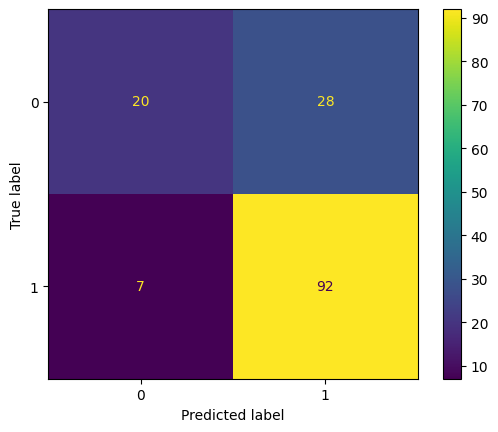

In [348]:
cm_test_knn = confusion_matrix(y_test_encoded, y_pred_test_knn)
ConfusionMatrixDisplay(cm_test_knn).plot();

The number of True and False data in the confusion matrix:
- True Positive = 92 
- True Negative = 20
- False Positive = 7
- False Negative = 28

In [349]:
# Display True Positive data
display(y_test[(y_test_encoded == 1) & (y_pred_test_knn == 1)])

337    Y
476    Y
529    Y
149    Y
233    Y
      ..
362    Y
522    Y
47     Y
526    Y
93     Y
Name: Loan_Status, Length: 92, dtype: object

In [350]:
# Display False Negative data
display(y_test[(y_test_encoded == 0) & (y_pred_test_knn == 1)])

192    N
489    N
136    N
210    N
410    N
251    N
54     N
52     N
469    N
365    N
438    N
216    N
581    N
353    N
135    N
254    N
404    N
262    N
40     N
241    N
457    N
13     N
18     N
28     N
299    N
174    N
77     N
148    N
Name: Loan_Status, dtype: object

Based on the confusion matrix on this KNN model by predicting a total of 147 test data. This model can predict TRUE data (customers eligible for loans) as many as 92. However, in this model by focusing on recall metrics which are to maximize the detection of customers who are eligible for loans (False Negative), the model successfully detects 28 data classified as False Negative and reduces False Positive data which is detected only 7 data. Therefore, by using the KNN model, the number of customers who are eligible for loans will be detected as many as 120 (True positive + False Negative).

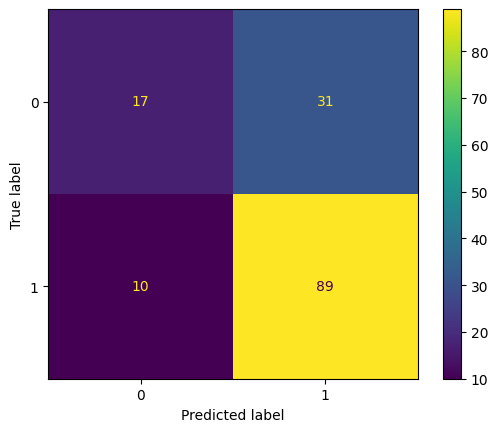

In [351]:
cm_test_boosting = confusion_matrix(y_test_encoded, y_pred_test_boosting)
ConfusionMatrixDisplay(cm_test_boosting).plot();

The number of True and False data in the confusion matrix:
- True Positive = 89 
- True Negative = 17
- False Positive = 10
- False Negative = 31

In [352]:
# Display True Positive data
display(y_test[(y_test_encoded == 1) & (y_pred_test_boosting == 1)])

446    Y
337    Y
476    Y
529    Y
222    Y
      ..
522    Y
599    Y
47     Y
526    Y
93     Y
Name: Loan_Status, Length: 89, dtype: object

In [353]:
# Display False Negative data
display(y_test[(y_test_encoded == 0) & (y_pred_test_boosting == 1)])

192    N
489    N
136    N
210    N
410    N
251    N
52     N
469    N
365    N
300    N
216    N
258    N
135    N
450    N
404    N
471    N
172    N
9      N
191    N
40     N
307    N
211    N
241    N
13     N
18     N
28     N
299    N
174    N
77     N
148    N
22     N
Name: Loan_Status, dtype: object

Based on the confusion matrix on this AdaBoost model by predicting a total of 147 test data. This model can predict TRUE data (customers eligible for loans) as many as 89. However, in this model by focusing on recall metrics which are to maximize the detection of customers who are eligible for loans (False Negative), the model managed to detect 31 data classified as False Negative and reduce False Positive data which was detected only 10 data. Therefore, by using the KNN model, the number of customers who are eligible for loans will be detected as many as 120 (True positive + False Negative).

# 12. Model Saving

In [354]:
with open('model_knn.pkl', 'wb') as file_1:
    pickle.dump(knn_gridcv_best, file_1)

# 13. Model Inference

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Gender</th>
      <th>Married</th>
      <th>Dependents</th>
      <th>Education</th>
      <th>Self_Employed</th>
      <th>ApplicantIncome</th>
      <th>CoapplicantIncome</th>
      <th>LoanAmount</th>
      <th>Loan_Amount_Term</th>
      <th>Credit_History</th>
      <th>Property_Area</th>
      <th>Predict_Loan_Status</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Female</td>
      <td>Yes</td>
      <td>1</td>
      <td>Not Graduate</td>
      <td>No</td>
      <td>52371</td>
      <td>14976</td>
      <td>473</td>
      <td>84</td>
      <td>0</td>
      <td>Semiurban</td>
      <td>Yes</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Female</td>
      <td>No</td>
      <td>3+</td>
      <td>Graduate</td>
      <td>Yes</td>
      <td>76060</td>
      <td>17298</td>
      <td>50</td>
      <td>60</td>
      <td>1</td>
      <td>Rural</td>
      <td>Yes</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Male</td>
      <td>Yes</td>
      <td>1</td>
      <td>Graduate</td>
      <td>Yes</td>
      <td>66956</td>
      <td>14871</td>
      <td>99</td>
      <td>240</td>
      <td>1</td>
      <td>Urban</td>
      <td>Yes</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Female</td>
      <td>Yes</td>
      <td>2</td>
      <td>Not Graduate</td>
      <td>Yes</td>
      <td>19179</td>
      <td>34307</td>
      <td>277</td>
      <td>12</td>
      <td>0</td>
      <td>Semiurban</td>
      <td>Yes</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Male</td>
      <td>No</td>
      <td>1</td>
      <td>Graduate</td>
      <td>Yes</td>
      <td>60204</td>
      <td>19229</td>
      <td>507</td>
      <td>180</td>
      <td>1</td>
      <td>Urban</td>
      <td>Yes</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Female</td>
      <td>No</td>
      <td>0</td>
      <td>Graduate</td>
      <td>Yes</td>
      <td>39686</td>
      <td>40720</td>
      <td>295</td>
      <td>36</td>
      <td>1</td>
      <td>Urban</td>
      <td>Yes</td>
    </tr>
    <tr>
      <th>6</th>
      <td>Female</td>
      <td>Yes</td>
      <td>2</td>
      <td>Graduate</td>
      <td>No</td>
      <td>47986</td>
      <td>32084</td>
      <td>218</td>
      <td>84</td>
      <td>1</td>
      <td>Urban</td>
      <td>Yes</td>
    </tr>
    <tr>
      <th>7</th>
      <td>Male</td>
      <td>Yes</td>
      <td>2</td>
      <td>Not Graduate</td>
      <td>Yes</td>
      <td>70262</td>
      <td>1362</td>
      <td>410</td>
      <td>240</td>
      <td>0</td>
      <td>Rural</td>
      <td>Yes</td>
    </tr>
    <tr>
      <th>8</th>
      <td>Female</td>
      <td>No</td>
      <td>2</td>
      <td>Not Graduate</td>
      <td>No</td>
      <td>57556</td>
      <td>30320</td>
      <td>153</td>
      <td>180</td>
      <td>1</td>
      <td>Rural</td>
      <td>Yes</td>
    </tr>
    <tr>
      <th>9</th>
      <td>Female</td>
      <td>Yes</td>
      <td>1</td>
      <td>Graduate</td>
      <td>Yes</td>
      <td>67212</td>
      <td>11315</td>
      <td>137</td>
      <td>180</td>
      <td>1</td>
      <td>Rural</td>
      <td>Yes</td>
    </tr>
    <tr>
      <th>10</th>
      <td>Male</td>
      <td>Yes</td>
      <td>0</td>
      <td>Graduate</td>
      <td>Yes</td>
      <td>80207</td>
      <td>13073</td>
      <td>680</td>
      <td>36</td>
      <td>0</td>
      <td>Urban</td>
      <td>Yes</td>
    </tr>
    <tr>
      <th>11</th>
      <td>Female</td>
      <td>No</td>
      <td>1</td>
      <td>Graduate</td>
      <td>Yes</td>
      <td>24711</td>
      <td>29362</td>
      <td>366</td>
      <td>480</td>
      <td>1</td>
      <td>Urban</td>
      <td>Yes</td>
    </tr>
    <tr>
      <th>12</th>
      <td>Female</td>
      <td>Yes</td>
      <td>3+</td>
      <td>Not Graduate</td>
      <td>Yes</td>
      <td>14053</td>
      <td>3125</td>
      <td>210</td>
      <td>12</td>
      <td>1</td>
      <td>Rural</td>
      <td>Yes</td>
    </tr>
    <tr>
      <th>13</th>
      <td>Male</td>
      <td>Yes</td>
      <td>1</td>
      <td>Graduate</td>
      <td>Yes</td>
      <td>51714</td>
      <td>17305</td>
      <td>389</td>
      <td>180</td>
      <td>1</td>
      <td>Rural</td>
      <td>Yes</td>
    </tr>
    <tr>
      <th>14</th>
      <td>Male</td>
      <td>Yes</td>
      <td>0</td>
      <td>Not Graduate</td>
      <td>Yes</td>
      <td>3776</td>
      <td>5486</td>
      <td>431</td>
      <td>480</td>
      <td>0</td>
      <td>Semiurban</td>
      <td>No</td>
    </tr>
    <tr>
      <th>15</th>
      <td>Female</td>
      <td>No</td>
      <td>3+</td>
      <td>Not Graduate</td>
      <td>Yes</td>
      <td>19331</td>
      <td>40880</td>
      <td>543</td>
      <td>180</td>
      <td>1</td>
      <td>Rural</td>
      <td>Yes</td>
    </tr>
    <tr>
      <th>16</th>
      <td>Male</td>
      <td>No</td>
      <td>2</td>
      <td>Graduate</td>
      <td>No</td>
      <td>37761</td>
      <td>13546</td>
      <td>617</td>
      <td>360</td>
      <td>0</td>
      <td>Semiurban</td>
      <td>Yes</td>
    </tr>
    <tr>
      <th>17</th>
      <td>Male</td>
      <td>Yes</td>
      <td>1</td>
      <td>Not Graduate</td>
      <td>No</td>
      <td>52168</td>
      <td>39697</td>
      <td>76</td>
      <td>480</td>
      <td>0</td>
      <td>Rural</td>
      <td>No</td>
    </tr>
    <tr>
      <th>18</th>
      <td>Male</td>
      <td>No</td>
      <td>1</td>
      <td>Not Graduate</td>
      <td>Yes</td>
      <td>51907</td>
      <td>28064</td>
      <td>455</td>
      <td>180</td>
      <td>1</td>
      <td>Semiurban</td>
      <td>Yes</td>
    </tr>
    <tr>
      <th>19</th>
      <td>Male</td>
      <td>No</td>
      <td>2</td>
      <td>Graduate</td>
      <td>No</td>
      <td>24379</td>
      <td>23889</td>
      <td>104</td>
      <td>480</td>
      <td>1</td>
      <td>Rural</td>
      <td>Yes</td>
    </tr>
  </tbody>
</table>
</div>

# 14. Conclusion

The conclusions obtained based on the analysis, creation, and prediction of customer loan status data using 5 models, namely KNN, SVM, Decision Tree, Random Forest, and AdaBoost, by focusing on recall metrics because in order to maximize the detection of customers who are eligible for loans are written as follows:
- The dataset consists of 614 rows and 13 columns, which successfully handled missing values and checked duplicate data so that the data used in the training and testing process amounted to 409 training data and 147 testing data.

- Train data balancing has been successfully carried out to help maximize classification predictions so that initially the minority data (N) amounted to 118 to 145.

- Of the five models, it is known that the best models that can predict this dataset are the KNN base model and the AdaBoost base model, because both have a high enough cross validation value compared to other models and the model is in the goodfit category with a small bias.

- The number of customers detected as loanworthy (True Positive and False Negative) based on checking the confusion matrix of the KNN and AdaBoost models is 120 customers. 

Future Improvement:
- To provide more classification predictions, it may be possible to train using other models, utilizing parameters with a tunning process.

# 15. Business Insight

Business Insights that can be obtained are:
- Based on the prediction results, about 120 out of 147 customers are eligible for loans. This means that about 81.6% of customers can get a loan.
- With a percentage of 81.6%, the company can improve customer loan management better, such as providing additional product or service offerings to customers.
- With the results of these predictions the company can provide more suitable interest to customers so as to reduce the risk of default that might occur in the future.

# 16. Conceptual Problem

**1. Explain the background of bagging and how bagging works!**
- Answer:

Bagging is done in classification algorithms, because it helps to increase the predictive value of the classification itself. The way it works is by dividing the train-set data into several parts randomly, then each train data is built its own model and each prediction result obtained is combined and then averaged or voted to determine the final prediction result. 

**2. Explain the difference between the Random Forest algorithm and the boosting algorithm you choose!**
- Answer:

Random forest is a collection of decision trees, which works by predicting the model individually then for the prediction result comes from the average value or voting from the combination of each prediction result. As for boosting itself works sequentially and improves the properties or errors of the previous model, so that each model is strengthened based on the prediction error of the previous model. 

**3. Explain what is meant by Cross Validation!**
- Answer:

A method used to evaluate the performance of a model by dividing the dataset into small segments. The model is then alternately trained and tested on these segments to assess how effective it is in processing data that has never been encountered before.